# Importing the Libraries

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Loading

In [338]:
app_df=pd.read_csv('../input/loan-defaulter/application_data.csv')
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [339]:
pre_df=pd.read_csv('../input/loan-defaulter/previous_application.csv')
pre_df.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
info=pd.read_csv("../input/loan-defaulter/columns_description.csv",encoding='latin1')


In [341]:
info

,ï»¿,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


# Data Understanding

In [342]:
app_df.shape

(307511, 122)

In [343]:
app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [344]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [345]:
pre_df.shape

(1670214, 37)

In [346]:
pre_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [347]:
pre_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Data Cleaning

In [348]:
#let us the number of nulls in the application dataset
app_df.isnull().sum()


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [349]:
# Nulls by percentage
app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [350]:
# Nulls in the previous application dataset
pre_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [351]:
# Nulls by percentage
pre_df.isnull().sum()/len(pre_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [352]:
empty=app_df.isnull().sum()/len(app_df)*100
empty=empty[empty>35]
empty
# The columns with bull values more than 35%

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [353]:
len(empty)

49

In [354]:
# Null Removal
empty = list(empty[empty.values>=35.0].index)
app_df.drop(labels=empty,axis=1,inplace=True)

In [355]:
app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [356]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [357]:
app_df.shape

(307511, 73)

In [358]:
empty1=pre_df.isnull().sum()/len(pre_df)*100
empty1=empty1[empty1>35]
empty1

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [359]:
len(empty1)

11

In [360]:
empty1 = list(empty1[empty1.values>=35.0].index)
pre_df.drop(labels=empty1,axis=1,inplace=True)

In [361]:
pre_df.isnull().sum()/len(pre_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [362]:
pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [363]:
pre_df.shape

(1670214, 26)

**Lets start with application dataframe(app_df)**

In [364]:
app_df.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

In [365]:
app_df.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [366]:
app_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [367]:
app_df[app_df.CODE_GENDER=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,1,1,1,1,1,0,NaN,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.295998,0.461482,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.709205,0.310818,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.659185,0.076984,7.0,1.0,7.0,1.0,-851.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,-9649,-2293,-4099.0,-2326,1,1,1,1,1,0,NaN,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.658620,0.360613,10.0,4.0,10.0,4.0,-1681.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


In [368]:
app_df.drop(app_df[app_df.CODE_GENDER=='XNA'].index,inplace=True)

In [369]:
app_df.shape

(307507, 73)

In [370]:
app_df.FLAG_OWN_CAR.value_counts()

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

In [371]:
app_df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29275
Name: NAME_CONTRACT_TYPE, dtype: int64

In [372]:
app_df.FLAG_OWN_REALTY.value_counts()

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [373]:
app_df.CNT_CHILDREN.describe()

count    307507.000000
mean          0.417047
std           0.722119
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

<AxesSubplot:xlabel='CNT_CHILDREN'>

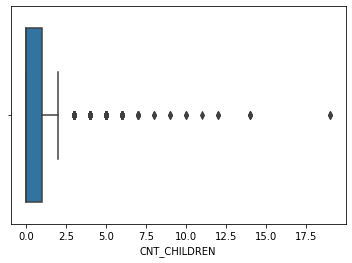

In [374]:
sns.boxplot(app_df.CNT_CHILDREN)


**Its mostly unkikely that someone has more then 8 kids and such a low income so we remove the rows  with kids more than 8**

In [375]:
app_df.AMT_INCOME_TOTAL.describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

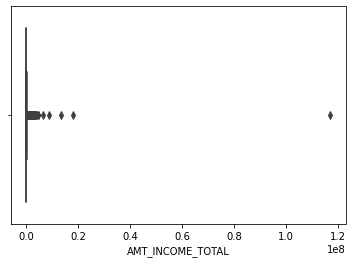

In [376]:
sns.boxplot(app_df.AMT_INCOME_TOTAL)
#we have an outlier here

In [377]:
len(app_df[app_df.AMT_INCOME_TOTAL>25000000])

1

In [378]:
app_df=app_df[app_df.AMT_INCOME_TOTAL<25000000]

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

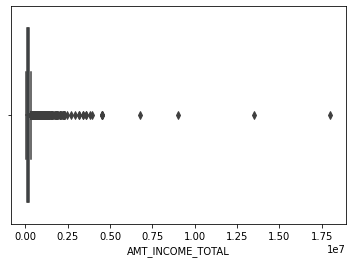

In [379]:
sns.boxplot(app_df.AMT_INCOME_TOTAL)

In [380]:
app_df.AMT_INCOME_TOTAL.dtype

dtype('float64')

In [381]:
app_df.AMT_CREDIT.describe()

count    3.075060e+05
mean     5.990287e+05
std      4.024933e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='AMT_CREDIT'>

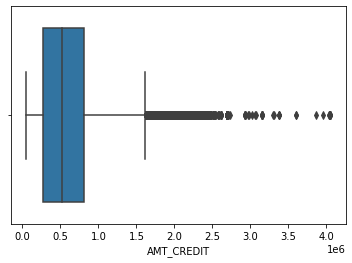

In [382]:
sns.boxplot(app_df.AMT_CREDIT)

In [383]:
app_df.AMT_ANNUITY.describe()

count    307494.000000
mean      27108.669759
std       14493.821852
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

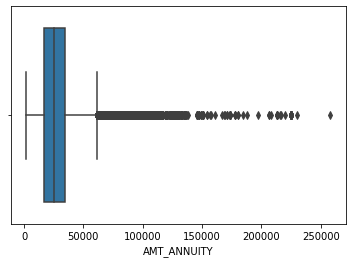

In [384]:
sns.boxplot(app_df.AMT_ANNUITY)

In [385]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [386]:
app_df.AMT_ANNUITY.describe()

count    307494.000000
mean      27108.669759
std       14493.821852
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [387]:
app_df.AMT_ANNUITY.isnull().sum()

12

**Filling the missing values with the median**

In [388]:
app_df.AMT_ANNUITY=app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median())

In [389]:
app_df.AMT_ANNUITY.isnull().sum()

0

<AxesSubplot:xlabel='AMT_ANNUITY'>

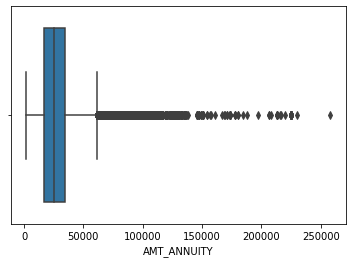

In [390]:
sns.boxplot(app_df.AMT_ANNUITY)

In [391]:
app_df['AMT_GOODS_PRICE'].describe()

count    3.072280e+05
mean     5.383980e+05
std      3.694478e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:ylabel='AMT_GOODS_PRICE'>

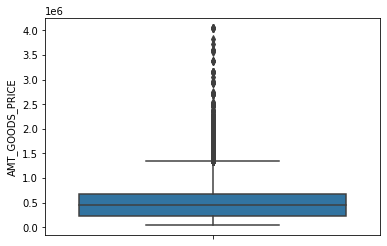

In [392]:
sns.boxplot(y=app_df['AMT_GOODS_PRICE'])

In [393]:
app_df['AMT_GOODS_PRICE'].isnull().sum()

278

In [394]:
len(app_df[app_df['AMT_GOODS_PRICE'].isnull()])/len(app_df)*100

0.09040474007011245

In [395]:
app_df['AMT_GOODS_PRICE'].median()

450000.0

**As our data may contain outliers we have to fill the missing values with median**

In [396]:
app_df['AMT_GOODS_PRICE']=app_df['AMT_GOODS_PRICE'].fillna(app_df['AMT_GOODS_PRICE'].median())

In [397]:
app_df['AMT_GOODS_PRICE'].isnull().sum()

0

In [398]:
app_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248522
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [399]:
app_df.NAME_TYPE_SUITE.isnull().sum()

1292

**As this is a catergorical variable we will use mode to fill the missing values**

In [400]:
app_df.NAME_TYPE_SUITE=app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0])

In [401]:
app_df.NAME_TYPE_SUITE.isnull().sum()


0

In [402]:
app_df.NAME_INCOME_TYPE.value_counts()

Working                 158770
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [403]:
app_df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218388
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [404]:
app_df.NAME_FAMILY_STATUS.value_counts()

Married                 196428
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [405]:
app_df.NAME_HOUSING_TYPE.value_counts()

House / apartment      272864
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [406]:
app_df.REGION_POPULATION_RELATIVE.describe()

count    307506.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

<AxesSubplot:>

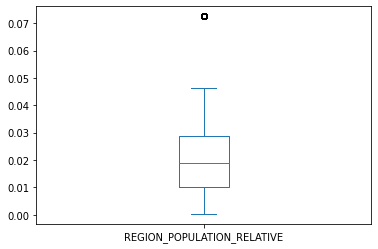

In [407]:
app_df.REGION_POPULATION_RELATIVE.plot.box()

In [408]:
app_df.DAYS_BIRTH.describe()
# as we can see there are negative values in it we have to convert them into the positive

count    307506.000000
mean     -16037.038399
std        4363.985156
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [409]:
app_df['DAYS_BIRTH'] = abs(app_df['DAYS_BIRTH'])

In [410]:
app_df.DAYS_BIRTH.describe()

count    307506.000000
mean      16037.038399
std        4363.985156
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

<AxesSubplot:>

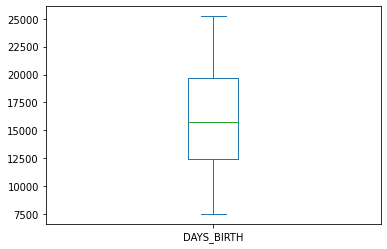

In [411]:
app_df.DAYS_BIRTH.plot.box()

In [412]:
app_df.DAYS_EMPLOYED.describe()

count    307506.000000
mean      63816.139734
std      141276.653998
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:>

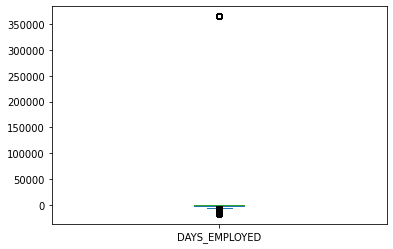

In [413]:
app_df.DAYS_EMPLOYED.plot.box()

In [414]:
#removing the outlier
app_df[app_df.DAYS_EMPLOYED==365243].shape

(55374, 73)

In [415]:
#removing the outlier
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED[app_df.DAYS_EMPLOYED<365243]


**After removal of outliers we have null values to treat**

In [416]:
app_df.DAYS_EMPLOYED.isnull().sum()

55374

In [417]:
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED.fillna(app_df.DAYS_EMPLOYED.median())

In [418]:
app_df.DAYS_EMPLOYED.isnull().sum()

0

**Lets also treat the neagative values**

In [419]:
app_df['DAYS_EMPLOYED'] = abs(app_df['DAYS_EMPLOYED'])

In [420]:
app_df.DAYS_EMPLOYED.describe()

count    307506.000000
mean       2251.586535
std        2136.162269
min           0.000000
25%         933.000000
50%        1648.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:>

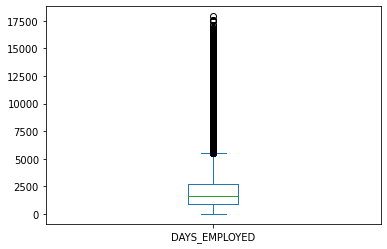

In [421]:
app_df.DAYS_EMPLOYED.plot.box()

In [422]:
app_df.DAYS_REGISTRATION.describe()

count    307506.000000
mean      -4986.125601
std        3522.887303
min      -24672.000000
25%       -7479.750000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [423]:
app_df['DAYS_REGISTRATION'] = abs(app_df['DAYS_REGISTRATION'])

<AxesSubplot:>

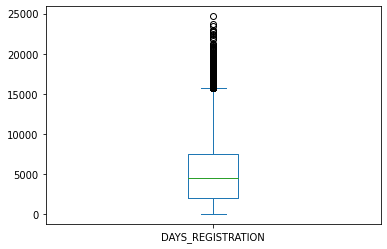

In [424]:
app_df.DAYS_REGISTRATION.plot.box()

In [425]:
app_df.DAYS_REGISTRATION.describe()

count    307506.000000
mean       4986.125601
std        3522.887303
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.750000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [426]:
app_df.DAYS_ID_PUBLISH.describe()

count    307506.000000
mean      -2994.199560
std        1509.456567
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [427]:
app_df['DAYS_ID_PUBLISH'] = abs(app_df['DAYS_ID_PUBLISH'])

<AxesSubplot:xlabel='DAYS_ID_PUBLISH'>

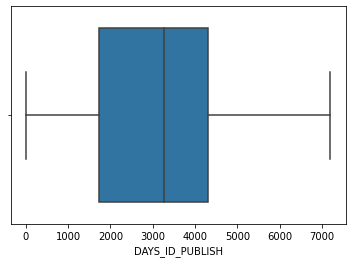

In [428]:
sns.boxplot(app_df.DAYS_ID_PUBLISH)

In [429]:
app_df.FLAG_MOBIL.value_counts()

1    307505
0         1
Name: FLAG_MOBIL, dtype: int64

<AxesSubplot:>

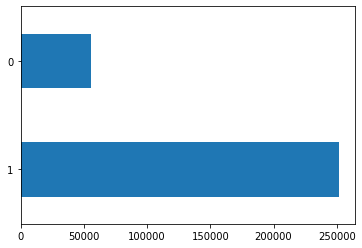

In [430]:
app_df.FLAG_EMP_PHONE.value_counts().plot.barh()

<AxesSubplot:>

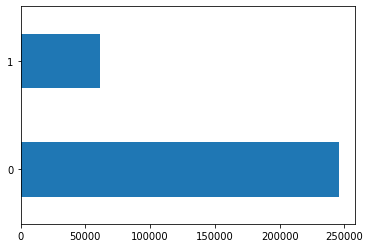

In [431]:
app_df.FLAG_WORK_PHONE.value_counts().plot.barh()

In [432]:
app_df.FLAG_CONT_MOBILE.value_counts()

1    306932
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

<AxesSubplot:>

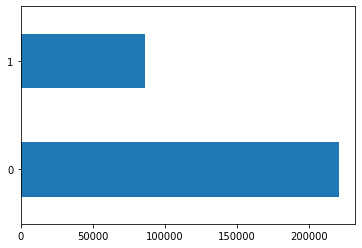

In [433]:
app_df.FLAG_PHONE.value_counts().plot.barh()

In [434]:
app_df.FLAG_EMAIL.value_counts()

0    290064
1     17442
Name: FLAG_EMAIL, dtype: int64

<AxesSubplot:>

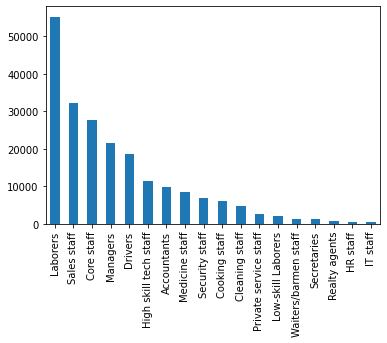

In [435]:
app_df.OCCUPATION_TYPE.value_counts().plot.bar()

In [436]:
app_df.OCCUPATION_TYPE.isnull().sum()

96389

**Lets fill the missing values**

In [437]:
app_df.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [438]:
app_df.OCCUPATION_TYPE=app_df.OCCUPATION_TYPE.fillna(app_df.OCCUPATION_TYPE.mode()[0])

In [439]:
app_df.OCCUPATION_TYPE.isnull().sum()

0

In [440]:
app_df.CNT_FAM_MEMBERS.describe()

count    307504.000000
mean          2.152655
std           0.910680
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

<AxesSubplot:>

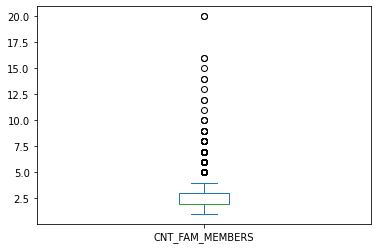

In [441]:
app_df.CNT_FAM_MEMBERS.plot.box()

In [442]:
app_df.CNT_FAM_MEMBERS.isnull().sum()

2

In [443]:
app_df.CNT_FAM_MEMBERS=app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.median())

In [444]:
app_df.CNT_FAM_MEMBERS.isnull().sum()

0

<AxesSubplot:>

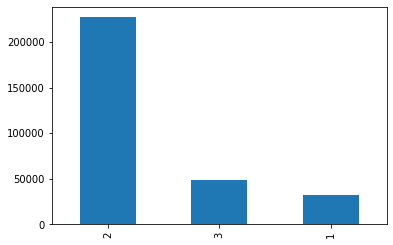

In [445]:
app_df.REGION_RATING_CLIENT.value_counts().plot.bar()

<AxesSubplot:>

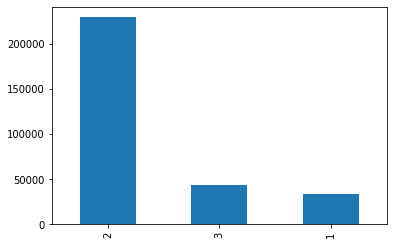

In [446]:
app_df.REGION_RATING_CLIENT_W_CITY.value_counts().plot.bar()

<AxesSubplot:>

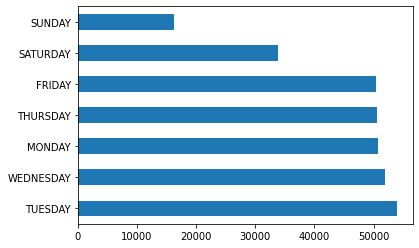

In [447]:
app_df.WEEKDAY_APPR_PROCESS_START.value_counts().plot.barh()

In [448]:
app_df.HOUR_APPR_PROCESS_START.value_counts()

10    37721
11    37229
12    34233
13    30959
14    27681
9     27384
15    24837
16    20384
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [449]:
app_df.REG_REGION_NOT_LIVE_REGION.value_counts()

0    302849
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [450]:
app_df.REG_REGION_NOT_WORK_REGION.value_counts()

0    291894
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [451]:
app_df.LIVE_REGION_NOT_WORK_REGION.value_counts()

0    295003
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [452]:
app_df.REG_CITY_NOT_LIVE_CITY.value_counts()

0    283467
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [453]:
app_df.REG_CITY_NOT_WORK_CITY.value_counts()

0    236639
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

<AxesSubplot:>

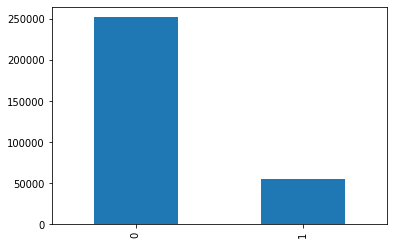

In [454]:
app_df.LIVE_CITY_NOT_WORK_CITY.value_counts().plot.bar()

In [455]:
app_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67991
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

**Droping Unwanted columns**

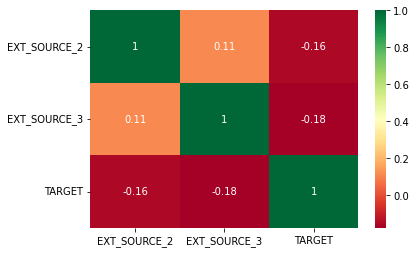

In [456]:
unwanted = app_df[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
unwanted_corr = unwanted.corr()
ax = sns.heatmap(unwanted_corr,
            xticklabels=unwanted_corr.columns,
            yticklabels=unwanted_corr.columns,
            annot = True,
            cmap ="RdYlGn")

**Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns**

In [457]:
app_df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

In [458]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [459]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE=app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median())

In [460]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [461]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    307506.000000
mean          1.417491
std           2.398340
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:>

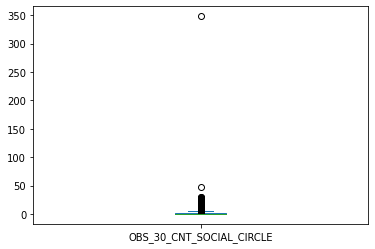

In [462]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.plot.box()

In [463]:
app_df[app_df.OBS_30_CNT_SOCIAL_CIRCLE>=60]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
148403,272071,0,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,180000.0,Family,State servant,Higher education,Single / not married,House / apartment,0.020246,10111,1917.0,2306.0,2306,1,1,0,1,0,0,Core staff,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,Police,348.0,34.0,344.0,24.0,-667.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,3.0


In [464]:
app_df=app_df[app_df.OBS_30_CNT_SOCIAL_CIRCLE<47]

In [465]:
app_df.shape

(307504, 71)

<AxesSubplot:>

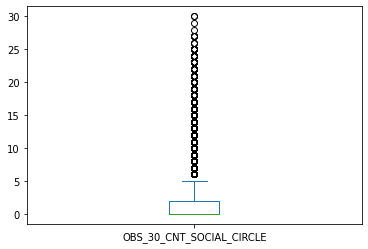

In [466]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.plot.box()

In [467]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    307504.000000
mean          1.416216
std           2.314019
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [468]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

**Droping Null values**

In [469]:
app_df.dropna(subset=['DEF_30_CNT_SOCIAL_CIRCLE'], inplace=True)

In [470]:
app_df.shape

(306483, 71)

In [471]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306483.000000
mean          0.143297
std           0.442440
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE'>

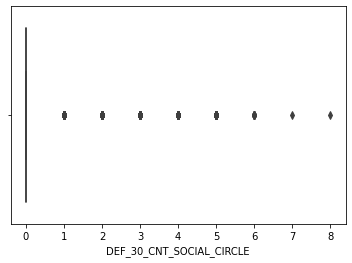

In [472]:
sns.boxplot(app_df.DEF_30_CNT_SOCIAL_CIRCLE)

In [473]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [474]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306483.000000
mean          1.403993
std           2.296407
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:>

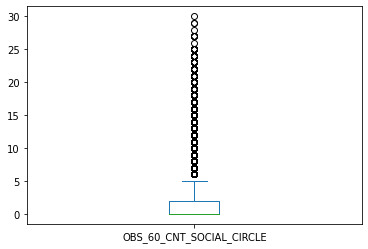

In [475]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.plot.box()

In [476]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [477]:
app_df.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306483.000000
mean          0.099957
std           0.359641
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE'>

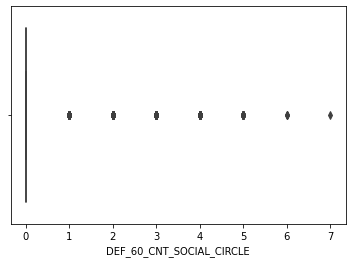

In [478]:
sns.boxplot(app_df.DEF_60_CNT_SOCIAL_CIRCLE)

In [479]:
app_df[app_df.DAYS_LAST_PHONE_CHANGE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,252000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.010643,8574,293.0,4790.0,1075,0,1,0,1,0,0,Laborers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Trade: type 3,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [480]:
app_df.shape

(306483, 71)

In [481]:
app_df=app_df.drop(15709)

In [482]:
app_df.shape

(306482, 71)

In [483]:
app_df.DAYS_LAST_PHONE_CHANGE.describe()

count    306482.000000
mean       -963.471470
std         826.992961
min       -4292.000000
25%       -1570.000000
50%        -758.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [484]:
app_df.DAYS_LAST_PHONE_CHANGE=abs(app_df.DAYS_LAST_PHONE_CHANGE)

In [485]:
app_df.DAYS_LAST_PHONE_CHANGE.describe()

count    306482.000000
mean        963.471470
std         826.992961
min           0.000000
25%         274.000000
50%         758.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<AxesSubplot:>

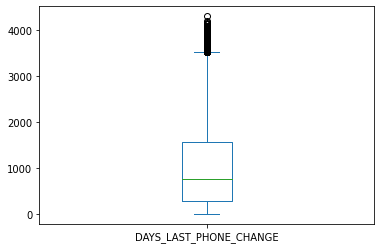

In [486]:
app_df.DAYS_LAST_PHONE_CHANGE.plot.box()

**Dropping unwanted columns**

In [487]:
flag = app_df[[ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','TARGET']]

<AxesSubplot:>

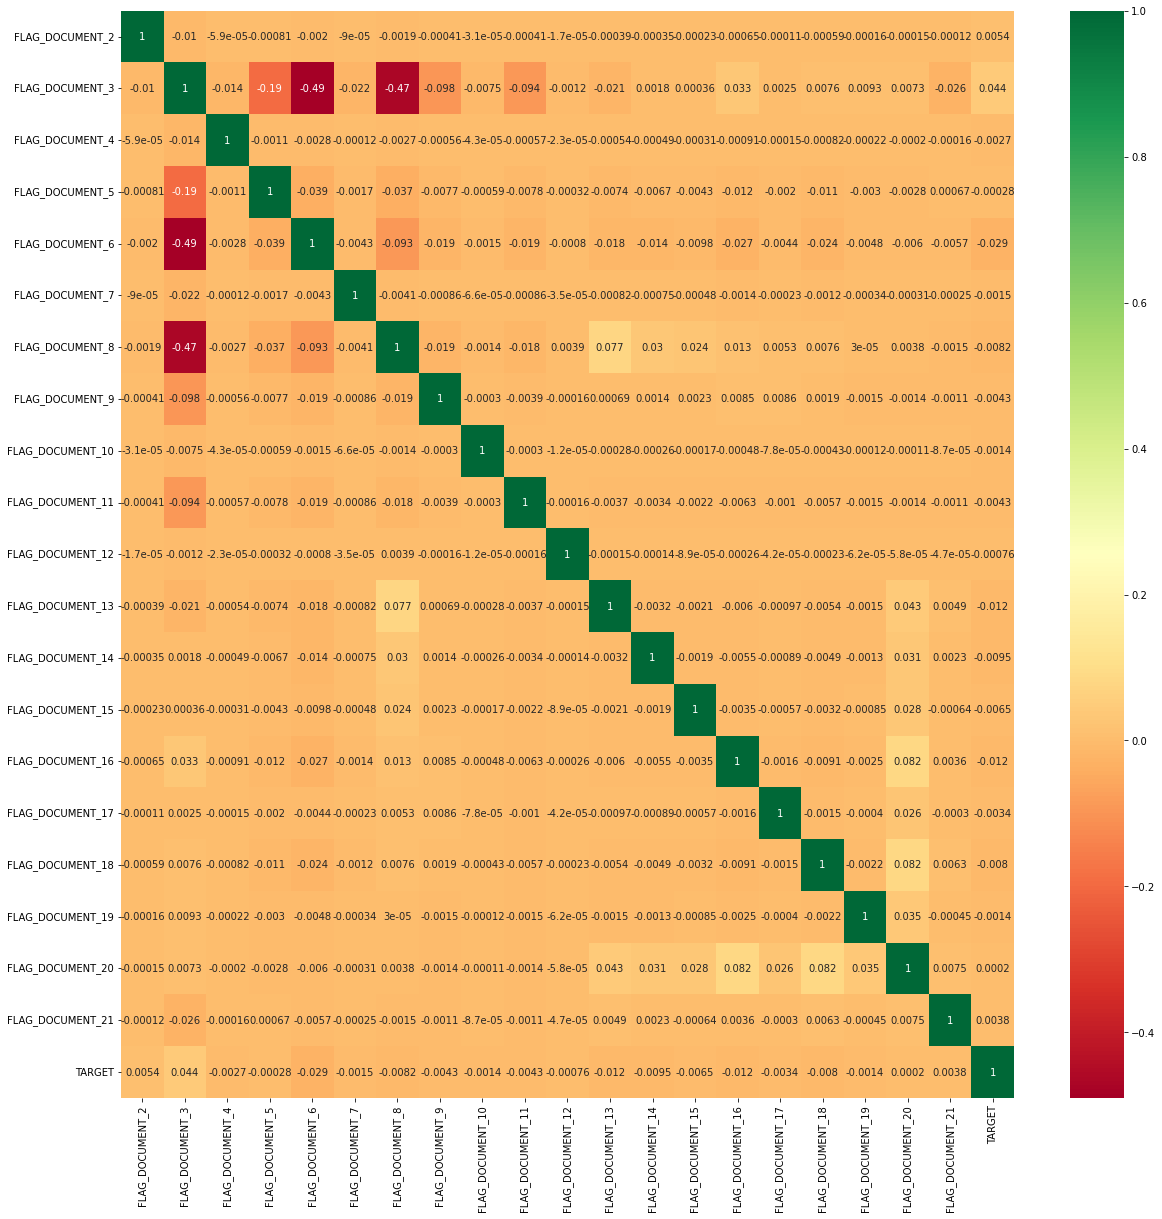

In [488]:
fig = plt.figure(figsize=(20,20))
flag_corr=flag.corr()
sns.heatmap(flag_corr,
            xticklabels=flag_corr.columns,
            yticklabels=flag_corr.columns,
            annot = True,
            cmap ="RdYlGn")

**As we can see there is not much of the correlation betweeen the flag_documents_X and the target varible so we can remove them**

In [489]:
app_df.iloc[:, 45:65].columns

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [490]:
app_df.drop(app_df.iloc[:, 45:65], inplace=True, axis=1)

In [491]:
app_df.shape

(306482, 51)

In [492]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41348

In [493]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR=app_df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_HOUR.median())

In [494]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

In [495]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    306482.000000
mean          0.005527
std           0.077958
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<AxesSubplot:>

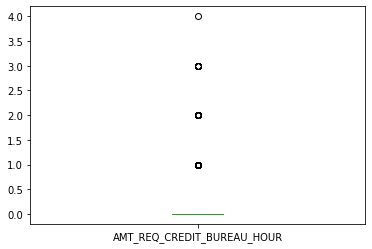

In [496]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.plot.box()

In [497]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41348

In [498]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY=app_df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_df.AMT_REQ_CREDIT_BUREAU_DAY.median())

In [499]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [500]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    306482.000000
mean          0.006072
std           0.103194
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_DAY'>

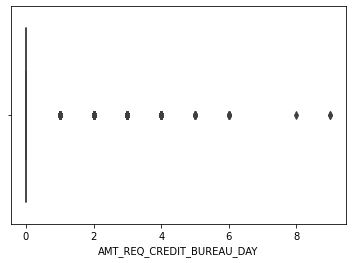

In [501]:
sns.boxplot(app_df.AMT_REQ_CREDIT_BUREAU_DAY)

In [502]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

41348

In [503]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK=app_df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_df.AMT_REQ_CREDIT_BUREAU_WEEK.median())

In [504]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

In [505]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    306482.000000
mean          0.029767
std           0.190852
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_WEEK'>

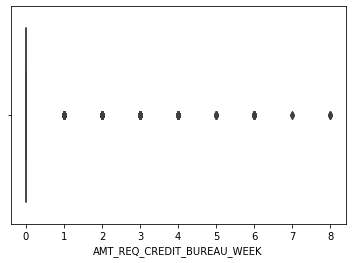

In [506]:
sns.boxplot(app_df.AMT_REQ_CREDIT_BUREAU_WEEK)

In [507]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41348

In [508]:
app_df.AMT_REQ_CREDIT_BUREAU_MON=app_df.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_df.AMT_REQ_CREDIT_BUREAU_MON.median())

In [509]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

In [510]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    306482.000000
mean          0.231341
std           0.856445
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<AxesSubplot:>

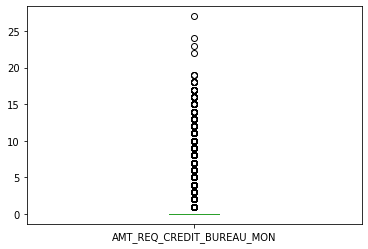

In [511]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.plot.box()

**Lets remove the outlier**

In [512]:
app_df=app_df[app_df.AMT_REQ_CREDIT_BUREAU_MON<20]

In [513]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41348

In [514]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT=app_df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_df.AMT_REQ_CREDIT_BUREAU_QRT.median())

In [515]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    306478.000000
mean          0.229804
std           0.744554
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_QRT'>

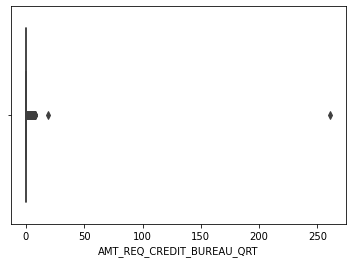

In [516]:
sns.boxplot(app_df.AMT_REQ_CREDIT_BUREAU_QRT)

In [517]:
app_df[app_df.AMT_REQ_CREDIT_BUREAU_QRT>50]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
239474,377322,0,Cash loans,F,N,Y,1,360000.0,1035000.0,30393.0,1035000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.026392,13590,3336.0,3629.0,3267,1,1,0,1,1,0,Accountants,3.0,2,2,MONDAY,19,0,0,0,0,0,0,Business Entity Type 2,3.0,0.0,3.0,0.0,695.0,0.0,0.0,0.0,1.0,261.0,0.0


In [518]:
app_df=app_df[app_df.AMT_REQ_CREDIT_BUREAU_QRT<50]

In [519]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41348

In [520]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR=app_df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_YEAR.median())

In [521]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    306477.000000
mean          1.779439
std           1.765418
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<AxesSubplot:>

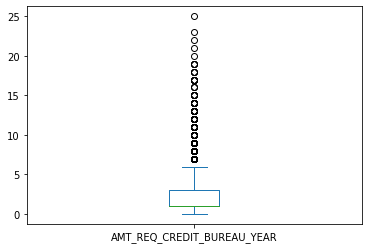

In [522]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.plot.box()

# Final Check

In [523]:
contact = app_df[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']]

<AxesSubplot:>

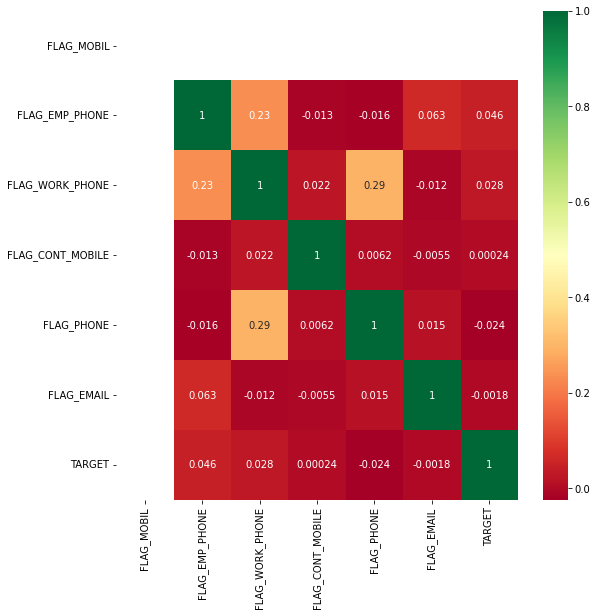

In [524]:

fig = plt.figure(figsize=(9,9))
contact_corr=contact.corr()
sns.heatmap(contact_corr,
            xticklabels=contact_corr.columns,
            yticklabels=contact_corr.columns,
            annot = True,
            cmap ="RdYlGn")

**There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted**

In [525]:
app_df.iloc[:,23:27].columns


Index(['FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'], dtype='object')

In [526]:
app_df.drop(app_df.iloc[:, 23:27], inplace=True, axis=1)

In [527]:
app_df.shape

(306477, 47)

In [528]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306477 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306477 non-null  int64  
 1   TARGET                       306477 non-null  int64  
 2   NAME_CONTRACT_TYPE           306477 non-null  object 
 3   CODE_GENDER                  306477 non-null  object 
 4   FLAG_OWN_CAR                 306477 non-null  object 
 5   FLAG_OWN_REALTY              306477 non-null  object 
 6   CNT_CHILDREN                 306477 non-null  int64  
 7   AMT_INCOME_TOTAL             306477 non-null  float64
 8   AMT_CREDIT                   306477 non-null  float64
 9   AMT_ANNUITY                  306477 non-null  float64
 10  AMT_GOODS_PRICE              306477 non-null  float64
 11  NAME_TYPE_SUITE              306477 non-null  object 
 12  NAME_INCOME_TYPE             306477 non-null  object 
 13 

In [529]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    app_df[col] =pd.Categorical(app_df[col])

In [530]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306477 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   306477 non-null  int64   
 1   TARGET                       306477 non-null  int64   
 2   NAME_CONTRACT_TYPE           306477 non-null  category
 3   CODE_GENDER                  306477 non-null  category
 4   FLAG_OWN_CAR                 306477 non-null  category
 5   FLAG_OWN_REALTY              306477 non-null  category
 6   CNT_CHILDREN                 306477 non-null  int64   
 7   AMT_INCOME_TOTAL             306477 non-null  float64 
 8   AMT_CREDIT                   306477 non-null  float64 
 9   AMT_ANNUITY                  306477 non-null  float64 
 10  AMT_GOODS_PRICE              306477 non-null  float64 
 11  NAME_TYPE_SUITE              306477 non-null  object  
 12  NAME_INCOME_TYPE             306477 non-null

**Lets create some bins for our dataset**

In [531]:
# Creating bins for income amount
app_df['AMT_INCOME_TOTAL']=app_df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_df['AMT_INCOME_RANGE']=pd.cut(app_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [532]:
app_df['AMT_INCOME_RANGE'].value_counts()

100K-200K    155470
200k-300k     64924
0-100K        63530
300k-400k     14605
400k-500k      5298
500k-600k      1083
600k-700k       848
800k-900k       291
700k-800k       157
900k-1M          28
1M Above         18
Name: AMT_INCOME_RANGE, dtype: int64

In [533]:
# Creating bins for Credit amount
app_df['AMT_CREDIT']=app_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app_df['AMT_CREDIT_RANGE']=pd.cut(app_df['AMT_CREDIT'],bins=bins,labels=slots)

In [534]:
app_df['AMT_CREDIT_RANGE'].value_counts()

200k-300k    54501
1M Above     49877
500k-600k    34174
400k-500k    31928
100K-200K    29921
300k-400k    26245
600k-700k    23998
800k-900k    21733
700k-800k    19169
900k-1M       8927
0-100K        6004
Name: AMT_CREDIT_RANGE, dtype: int64

In [535]:
# Creating bins for Age
app_df['AGE'] = app_df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,60,100]
slots = ['0-20','20-30','30-40','40-50','59-60','60 above']

app_df['AGE_GROUP']=pd.cut(app_df['AGE'],bins=bins,labels=slots)

In [536]:
app_df['AGE_GROUP'].value_counts()

30-40       82860
40-50       74153
59-60       67582
20-30       52595
60 above    29286
0-20            1
Name: AGE_GROUP, dtype: int64

In [537]:
# Creating bins for Employement Time
app_df['YEARS_EMPLOYED'] = app_df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

app_df['EMPLOYMENT_YEAR']=pd.cut(app_df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [538]:
app_df['EMPLOYMENT_YEAR'].value_counts()

0-5         179405
5-10         55815
10-20        32524
20-30         8385
30-40         2367
40-50          174
50-60            0
60 above         0
Name: EMPLOYMENT_YEAR, dtype: int64

In [539]:
app_df.shape

(306477, 53)

# Univariate/Bivariate Analysis

In [540]:
defaulters=app_df[app_df.TARGET==1]
non_defaulters=app_df[app_df.TARGET==0]

In [541]:
app_df.TARGET.value_counts(normalize=True)*100

0    91.911954
1     8.088046
Name: TARGET, dtype: float64

In [542]:
app_df.TARGET.value_counts(normalize=True)

0    0.91912
1    0.08088
Name: TARGET, dtype: float64

In [543]:
len(defaulters)/len(non_defaulters)*100

8.799775639091338

<AxesSubplot:ylabel='TARGET'>

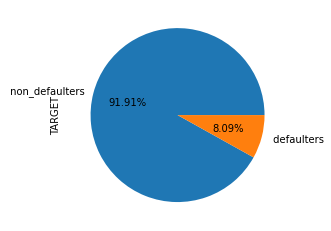

In [544]:
labels = ' non_defaulters', ' defaulters'
app_df.TARGET.value_counts().plot.pie(autopct='%1.2f%%',labels=labels)


**The data is unbalanced**

**Out of total only 8 percent people are the defaulters**

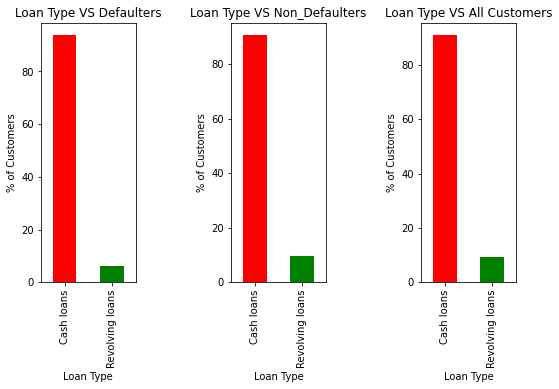

In [545]:
plt.subplot(1,3,1)
(defaulters.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color=['red', 'green'])
plt.ylabel("% of Customers")
plt.xlabel("Loan Type")
plt.title("Loan Type VS Defaulters")

plt.subplot(1,3,2)
(non_defaulters.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color=['red', 'green'])
plt.ylabel("% of Customers")
plt.xlabel("Loan Type")
plt.title("Loan Type VS Non_Defaulters")

plt.subplot(1,3,3)
(app_df.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color=['red', 'green'])
plt.ylabel("% of Customers")
plt.xlabel("Loan Type")
plt.title("Loan Type VS All Customers")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=1,
                    wspace=1,
                    hspace=0.4)
plt.show()



In [546]:
#  % defaulters on revolving loans
len(app_df[(app_df.NAME_CONTRACT_TYPE=='Revolving loans') & app_df.TARGET==1])/len(app_df[app_df.NAME_CONTRACT_TYPE=='Revolving loans'])*100

5.549656685779005

In [547]:
#  % defaulters on Cash Loan
len(app_df[(app_df.NAME_CONTRACT_TYPE=='Cash loans') & app_df.TARGET==1])/len(app_df[app_df.NAME_CONTRACT_TYPE=='Cash loans'])*100

8.345823314391692

In [548]:
#  Total loans
app_df.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         90.781037
Revolving loans     9.218963
Name: NAME_CONTRACT_TYPE, dtype: float64

**1 If we look at the number most are the customers have take the cash loans rather than revolving loan.**

**2 If we look the deafaulters more than 85 percent defaulters are on cash loan**


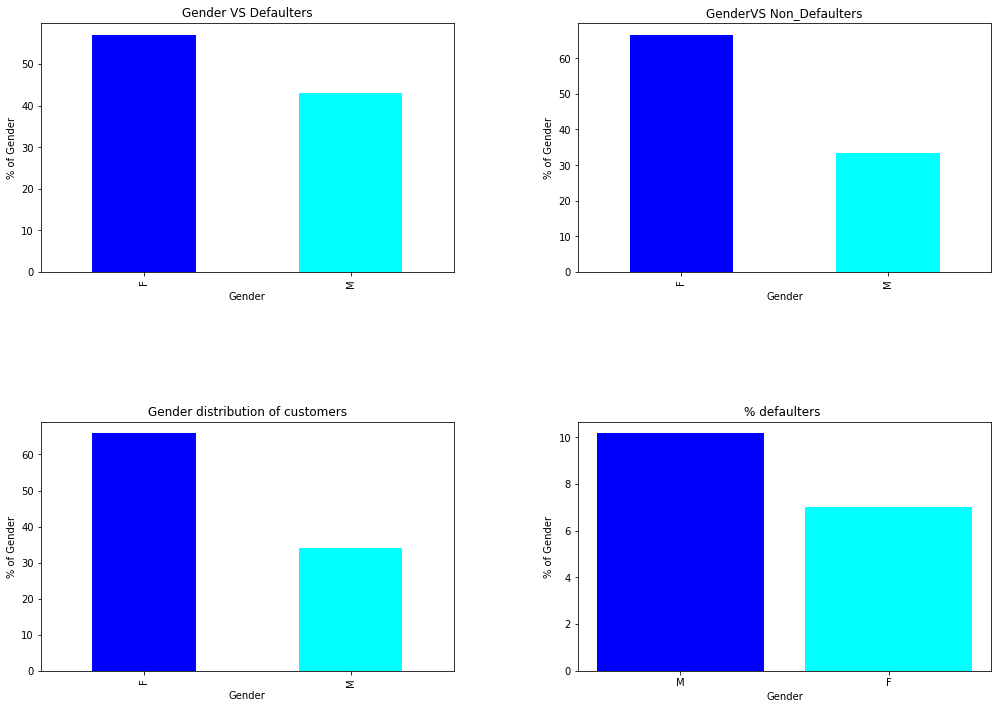

In [549]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
(defaulters.CODE_GENDER.value_counts(normalize=True)*100).plot.bar(color=['blue', 'cyan'])
plt.ylabel("% of Gender")
plt.xlabel("Gender")
plt.title("Gender VS Defaulters")

plt.subplot(2,2,2)
(non_defaulters.CODE_GENDER.value_counts(normalize=True)*100).plot.bar(color=['blue', 'cyan'])
plt.ylabel("% of Gender")
plt.xlabel("Gender")
plt.title("GenderVS Non_Defaulters")

plt.subplot(2,2,3)
(app_df.CODE_GENDER.value_counts(normalize=True)*100).plot.bar(color=['blue', 'cyan'])
plt.ylabel("% of Gender")
plt.xlabel("Gender")
plt.title("Gender distribution of customers")

plt.subplot(2,2,4)

per_def = app_df[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
per_def["TARGET"] = per_def["TARGET"]*100
per_def.sort_values(by='TARGET', ascending=False, inplace=True)
 
s = plt.bar('CODE_GENDER', 
                    'TARGET', 
                    data=per_def,color=['blue', 'cyan'])
plt.ylabel("% of Gender")
plt.xlabel("Gender")
plt.title("% defaulters ")



plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    top=1,
                    wspace=0.3,
                    hspace=0.6)
plt.show()



**1 There are more female than male**

**2 More no of female are have defaulted the payments due to there grater no**

**3 Men are tend to become more defaulters than women even with their small representation**

In [550]:
# lets make some custom functions

def analysis(feature):
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    (defaulters[feature].value_counts(normalize=True)*100).plot.bar(color=['blue', 'green'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("Defaulters")

    plt.subplot(2,2,2)
    (non_defaulters[feature].value_counts(normalize=True)*100).plot.bar(color=['black', 'red'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("Non_Defaulters")

    plt.subplot(2,2,3)
    (app_df[feature].value_counts(normalize=True)*100).plot.bar(color=['yellow', 'cyan'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("distribution of customers")

    plt.subplot(2,2,4)

    per_def= app_df[[feature , 'TARGET']].groupby([feature],as_index=False).mean()
    per_def["TARGET"] = per_def["TARGET"]*100
    per_def.sort_values(by='TARGET', ascending=False, inplace=True)

    s = plt.bar(feature, 'TARGET',data=per_def,color=['purple', 'green'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("% defaulters ")
    plt.xticks(rotation=90)


    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1.2,
                        top=1,
                        wspace=0.3,
                        hspace=0.6)
    plt.show()

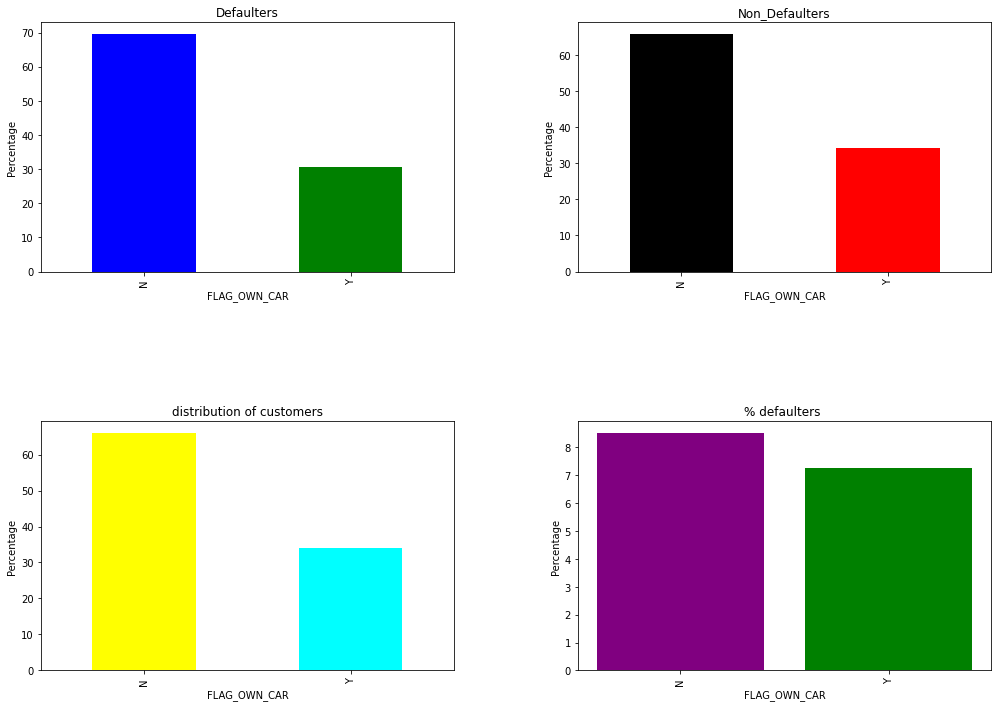

In [551]:
analysis('FLAG_OWN_CAR')

**We can't establish an significant relationship between owning a car and defaulting a payment**

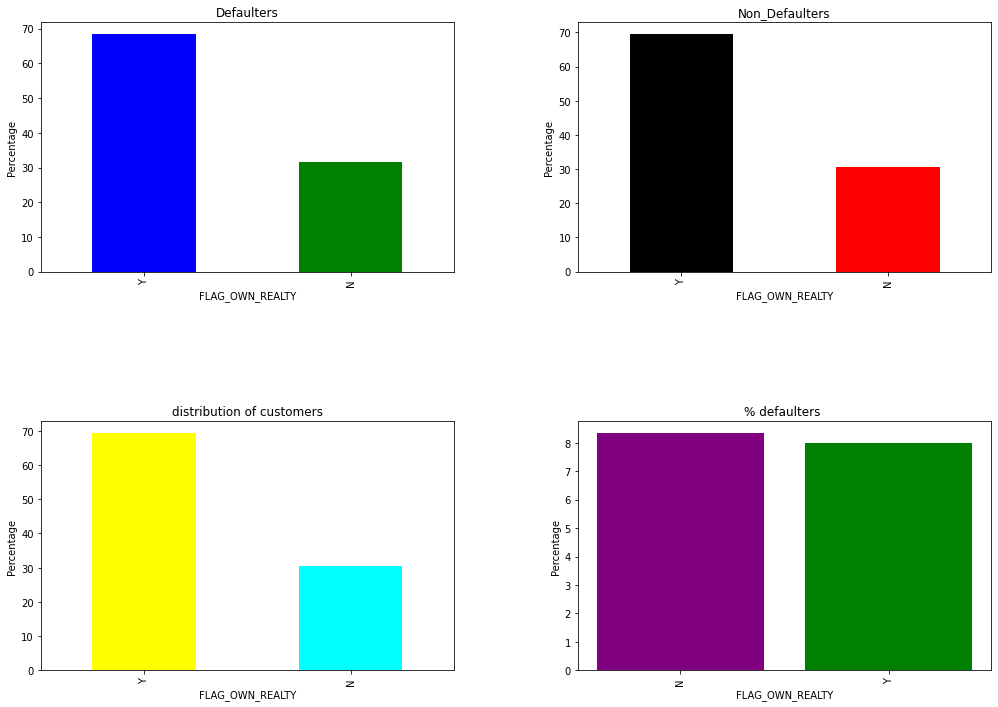

In [552]:
analysis('FLAG_OWN_REALTY')

**People owning a property are double in number but still defaulting percentage is quite same**

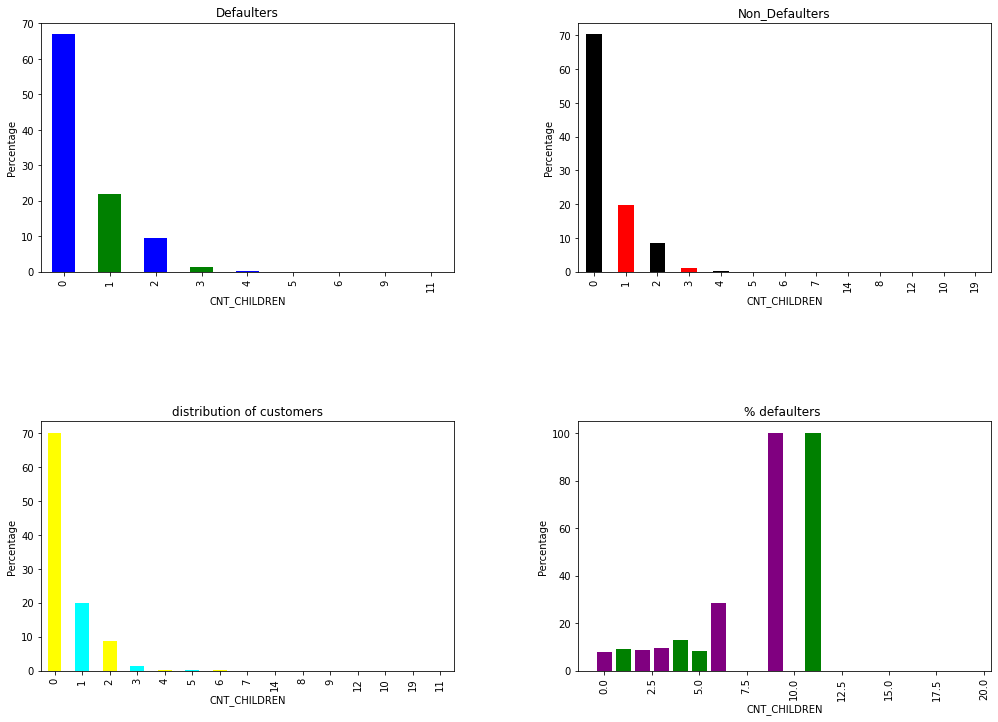

In [553]:
analysis('CNT_CHILDREN')

In [554]:
len(app_df[(app_df.CNT_CHILDREN==6)])

21

In [555]:
len(app_df[(app_df.CNT_CHILDREN==6) & app_df.TARGET==1])

6

**1 Mostly customers are having zero children**

**2 Parents with 6 kids and more are the highest number of defaulters but its worth noting that there number is very less**



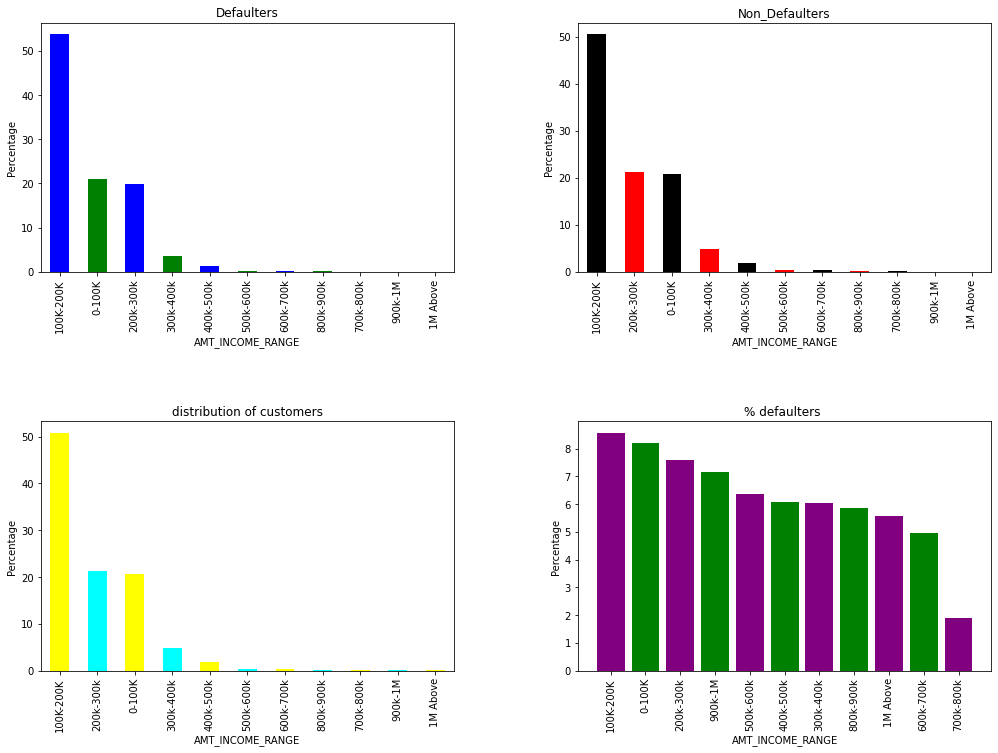

In [556]:
analysis('AMT_INCOME_RANGE')

**1 Most of the loans were given to the people with salaries less than 300k**

**2 If the salary is less than 500k more chances of defaulting chances for defaulting**

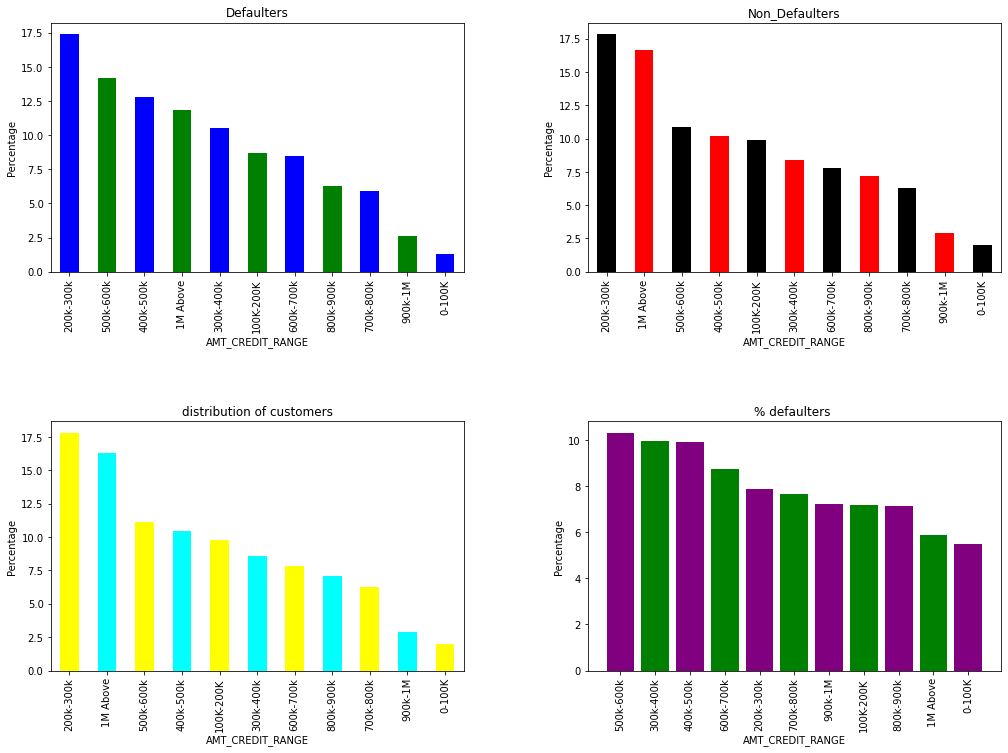

In [557]:
analysis('AMT_CREDIT_RANGE')

**1 People given loan between 300k and 700k have high possibilty to default**

**2 Most of the loans given are under 500k**

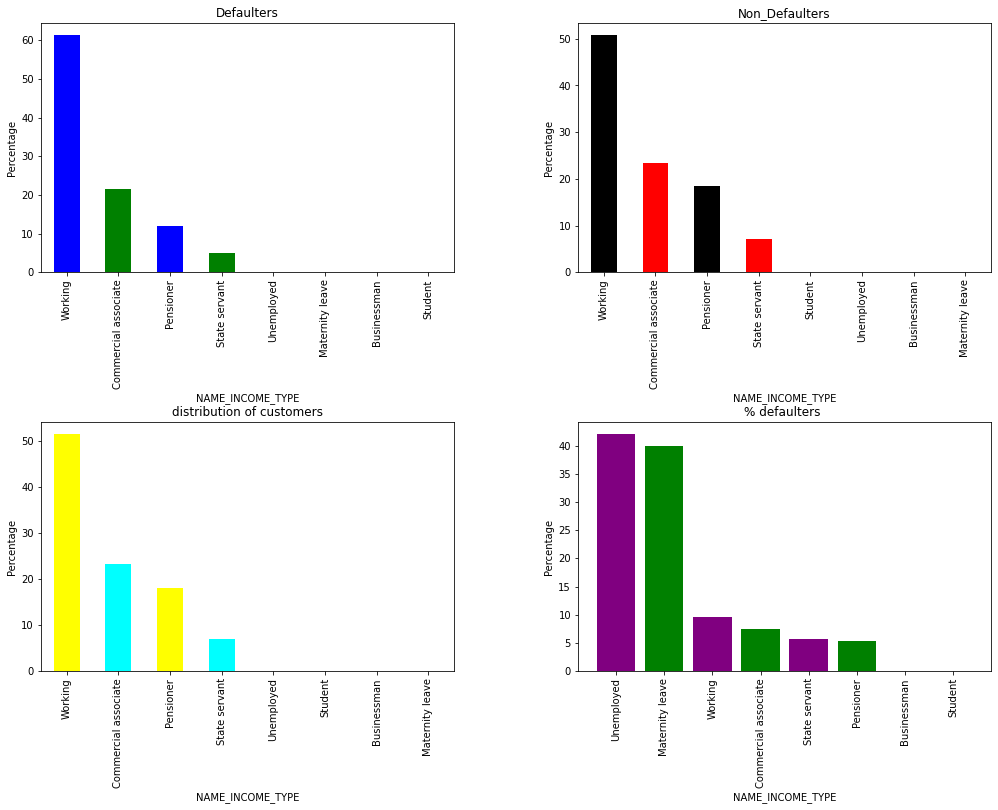

In [558]:
analysis('NAME_INCOME_TYPE')

**1 Most of the loan are given to working and commercial associates**

**2 People who are unemployed or are on maternity leave have high chances to default the payments**

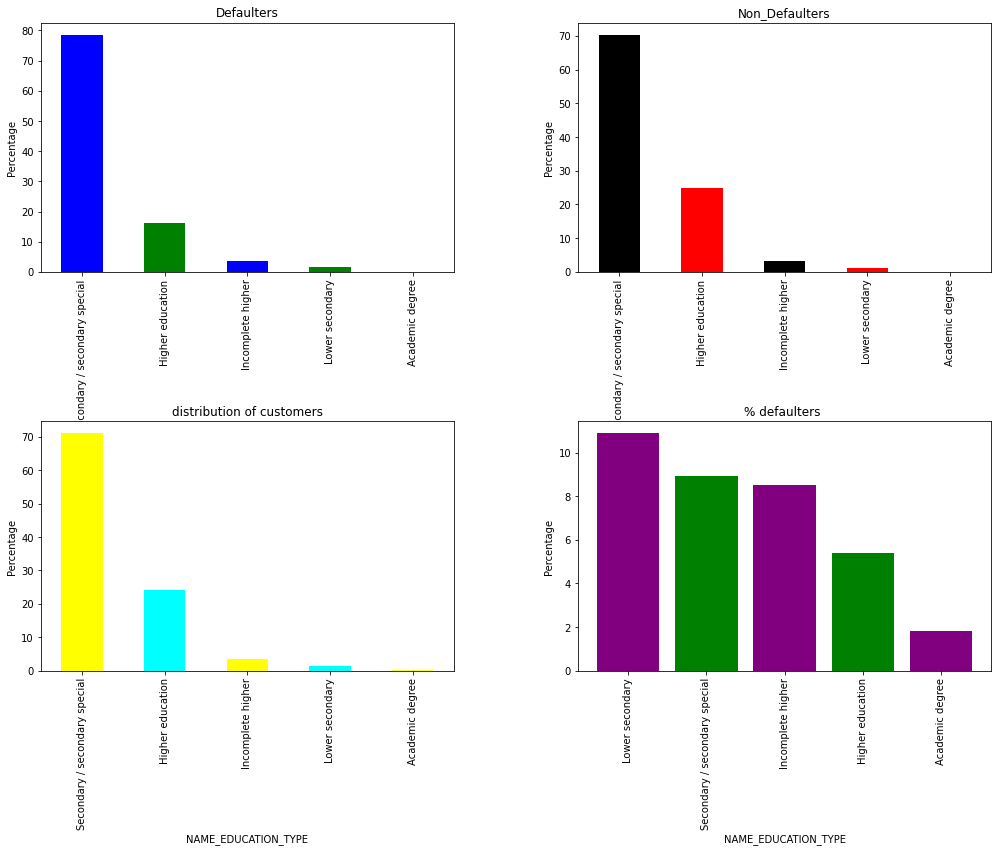

In [559]:
analysis('NAME_EDUCATION_TYPE')

**1 Most of the loan atre given to people with secondary education and higher education**

**2 People with Lower secondary education have more chances to be a defaulter**

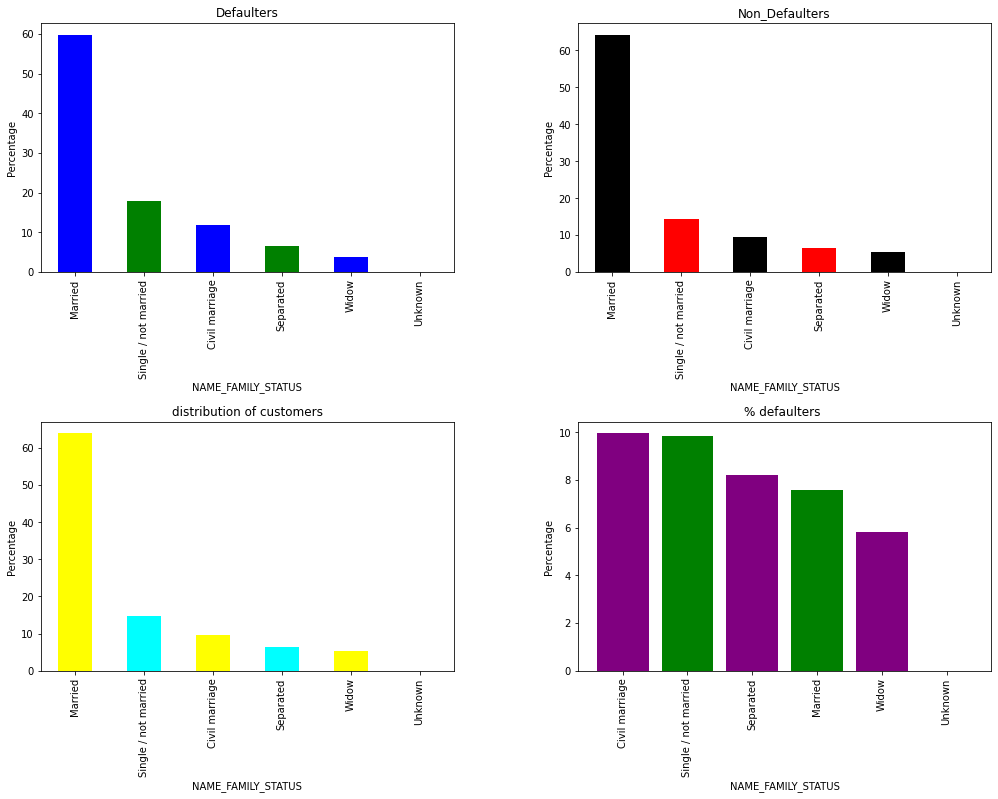

In [560]:
analysis('NAME_FAMILY_STATUS')

**1 most of the loans are given to the married people**

**2 People with civil marriage or single or seperated are more likely  to default**

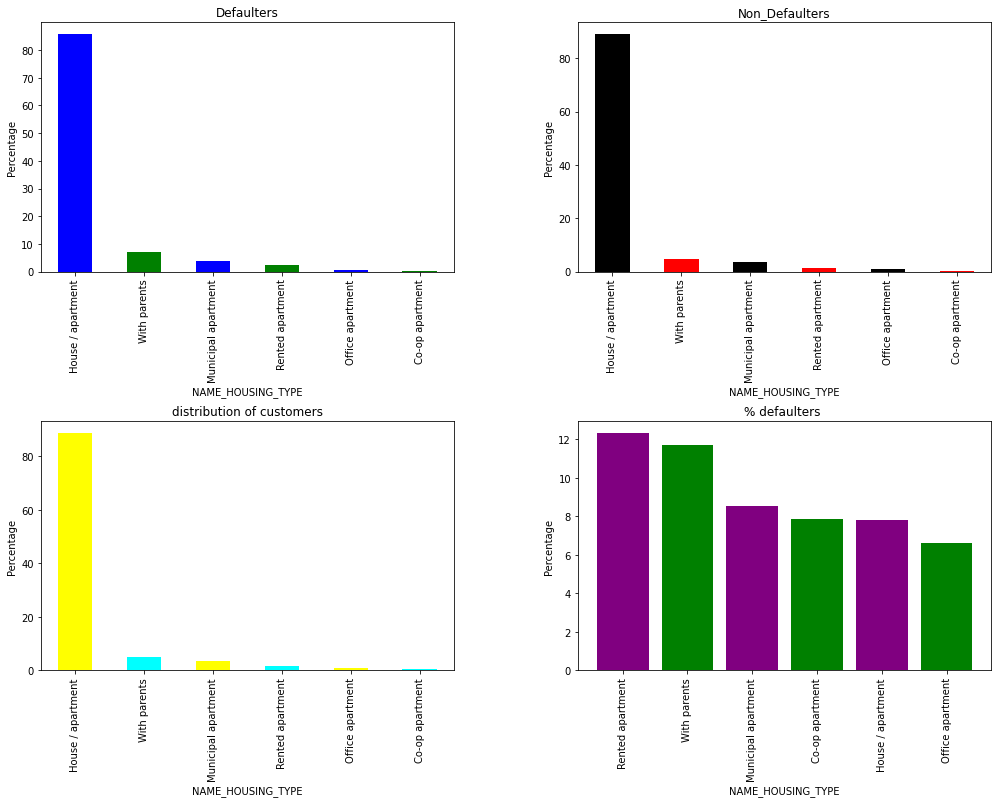

In [561]:
analysis('NAME_HOUSING_TYPE')

**1 Most of the customers with loan owns their property**

**2 People who live in rented appartments or are living with their parents likely to default a payment**

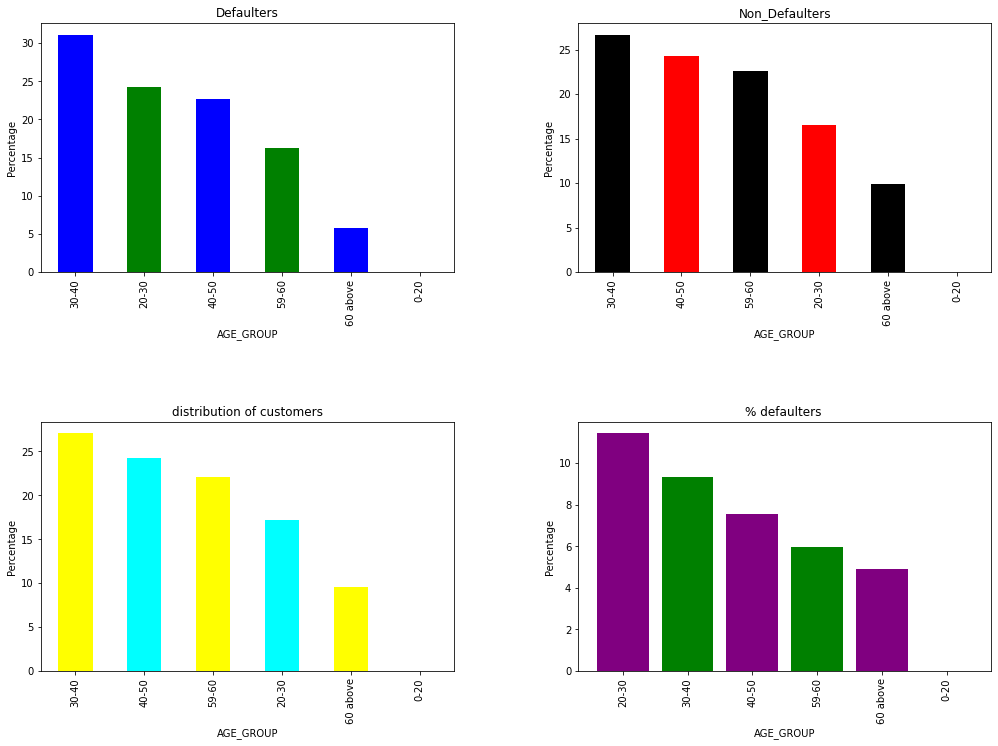

In [562]:
analysis('AGE_GROUP')

**Most of the loans are given to people within age 30-40**

**People in the age group range 20-40 have higher probability of defaulting People above age of 50 have low probability of defaulting**

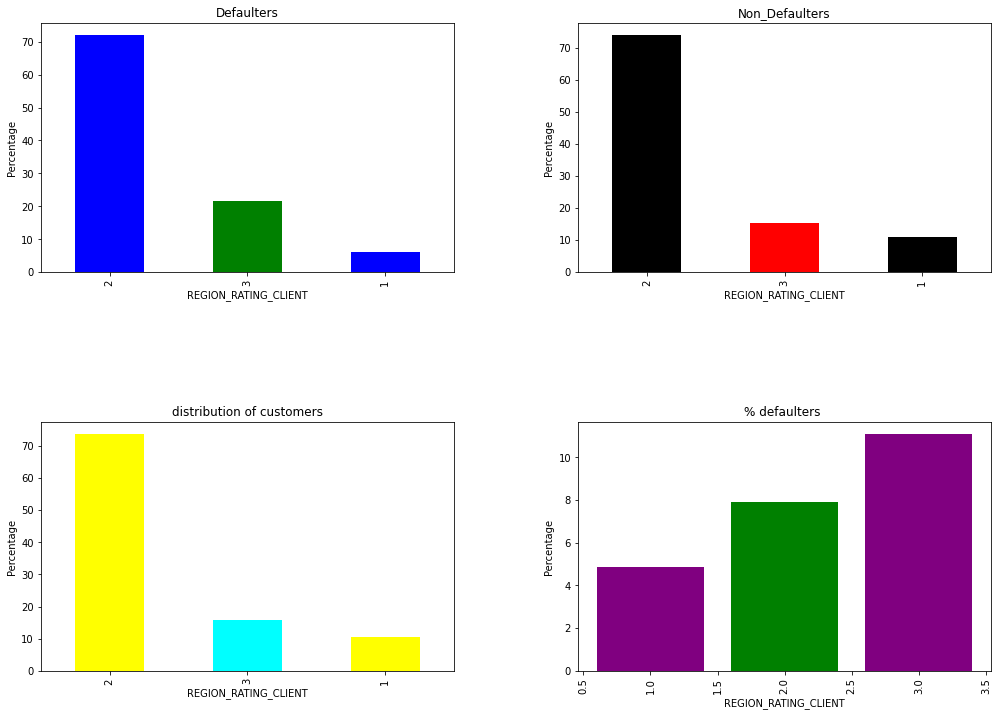

In [563]:
analysis('REGION_RATING_CLIENT')

**Most of the loans were given in region 2 but a great number of people from region 3 are defaulting**

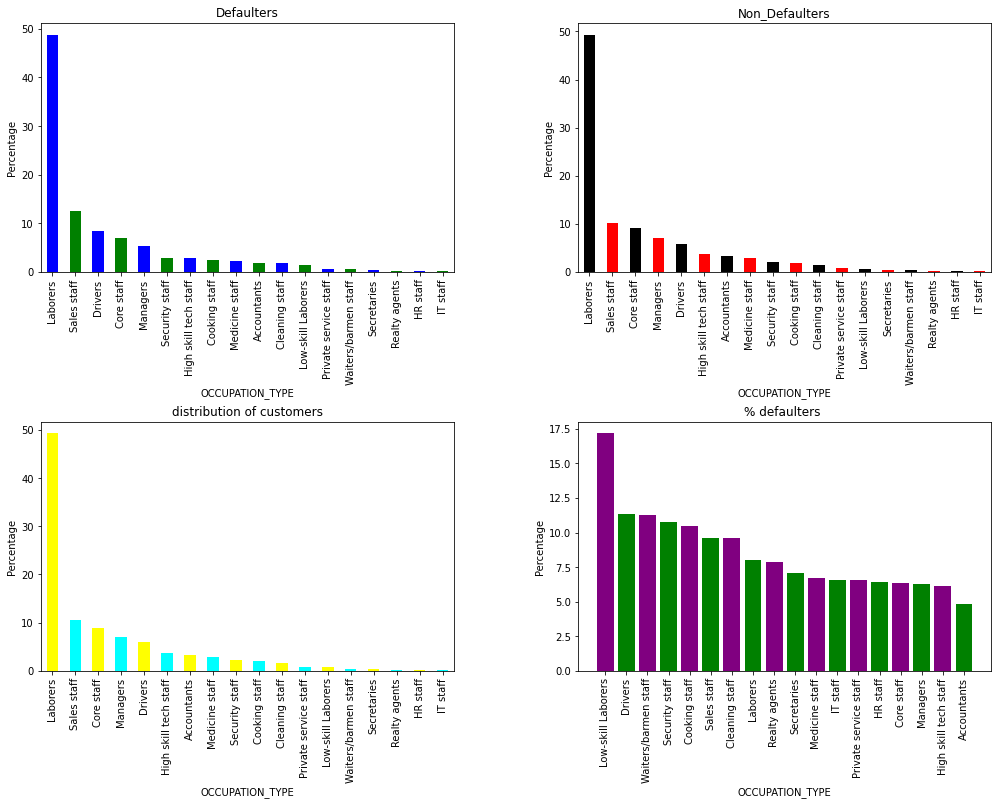

In [564]:
analysis('OCCUPATION_TYPE')

**1 Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans**

**2 Low-skill Laborers ,drivers Waiters/barmen staff, Security staff, Laborers and Cooking staff,sales staff are the highest categories to default**

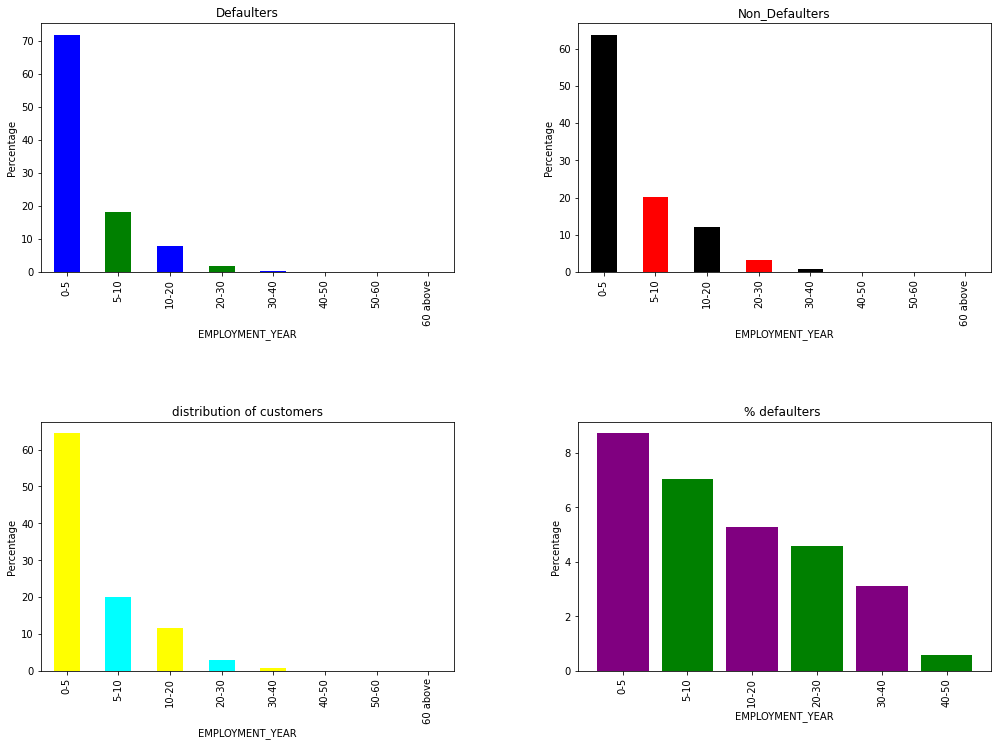

In [565]:
analysis('EMPLOYMENT_YEAR')

**1 Most of the loans are given to people in their early years of employment**

**2 More the experience less the default percentage**

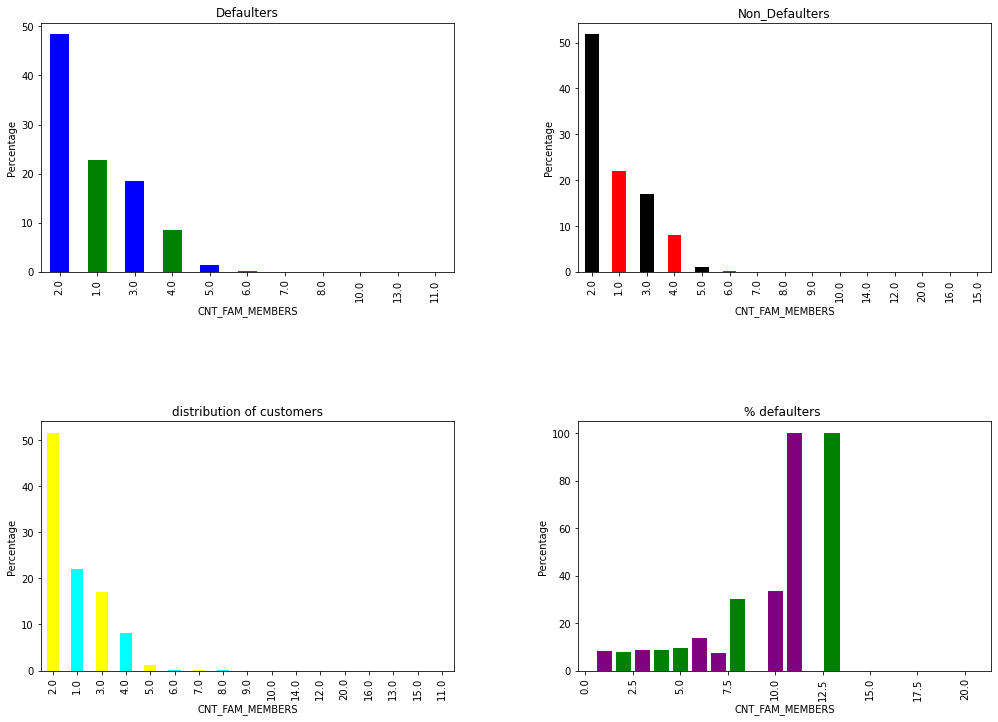

In [566]:
analysis('CNT_FAM_MEMBERS')

**1 More the number of family members more one likely to default**

**2 Most of the customers are having 2 or less than 2 kids**

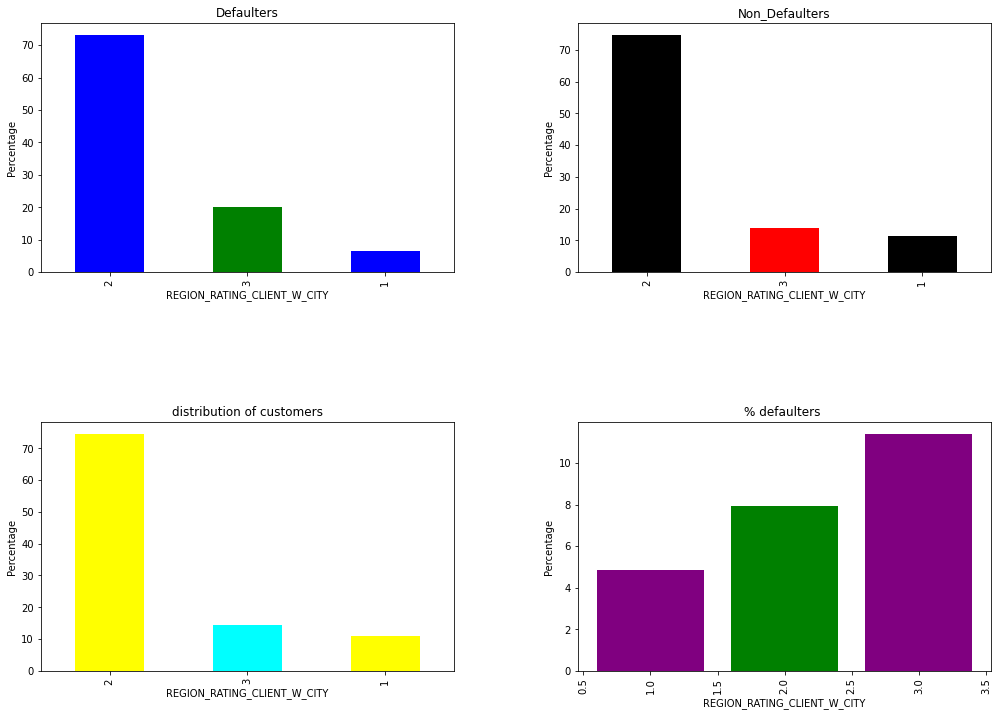

In [567]:
analysis('REGION_RATING_CLIENT_W_CITY')

****Most of the loans were given in tier 2 cities but a great number of people from tier 3 cities are defaulting****

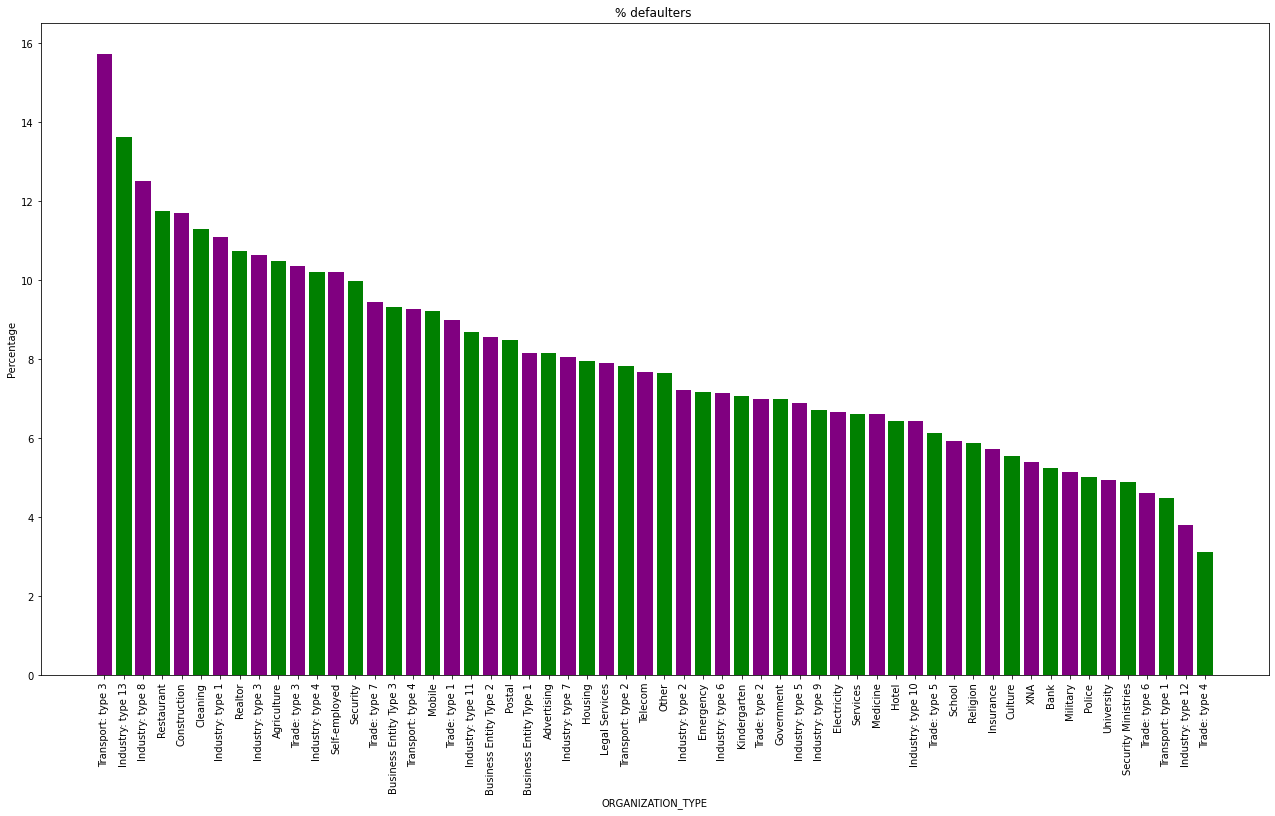

In [568]:
plt.figure(figsize=(22,12))
per_def= app_df[['ORGANIZATION_TYPE' , 'TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean()
per_def["TARGET"] = per_def["TARGET"]*100
per_def.sort_values(by='TARGET', ascending=False, inplace=True)

s = plt.bar('ORGANIZATION_TYPE', 'TARGET',data=per_def,color=['purple', 'green'])
plt.ylabel("Percentage")
plt.xlabel('ORGANIZATION_TYPE')
plt.title("% defaulters ")
plt.xticks(rotation=90)
plt.show()

**Organizations with highest percent of loans not repaid are Transport: type 3 , Industry: type 13 , Industry: type 8  and Restaurant**

# Multivariate analysis

**Correlation for defaulters**

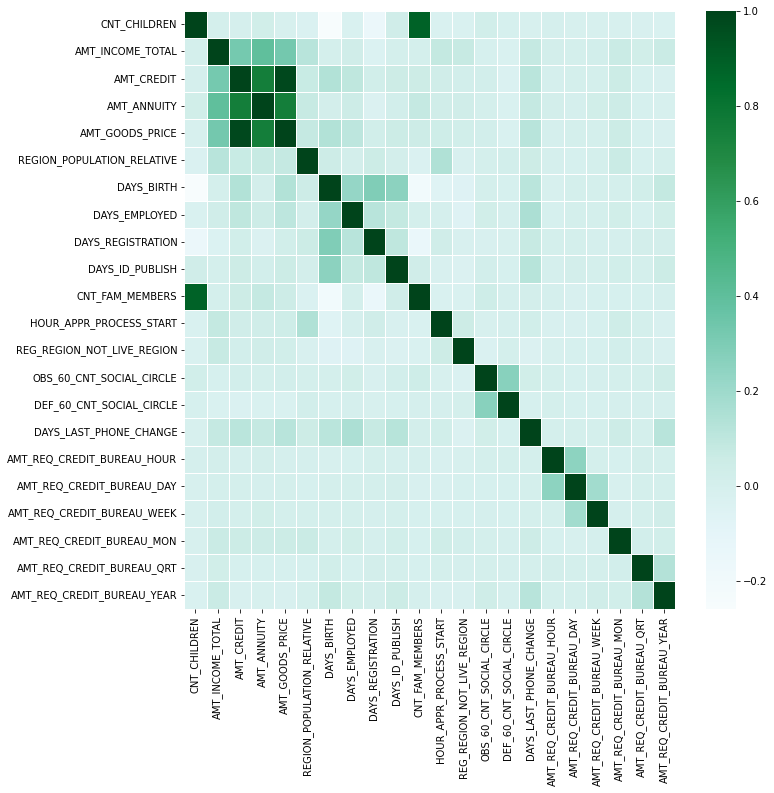

In [569]:
d=defaulters[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
plt.figure(figsize=(11,11))
sns.heatmap(d.corr(), cmap="BuGn",annot=False,linewidth =1)
plt.show()

**top 10 correlations for defaulters**

In [570]:
default=d.corr()
default_new=default.unstack().reset_index()
default_new.columns =['VAR1','VAR2','Correlation']
default_new.sort_values(by='Correlation', ascending=False, inplace=True)
default_new.iloc[22:32,:]

,VAR1,VAR2,Correlation
90,AMT_GOODS_PRICE,AMT_CREDIT,0.982778
48,AMT_CREDIT,AMT_GOODS_PRICE,0.982778
220,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885533
10,CNT_CHILDREN,CNT_FAM_MEMBERS,0.885533
70,AMT_ANNUITY,AMT_GOODS_PRICE,0.752038
91,AMT_GOODS_PRICE,AMT_ANNUITY,0.752038
47,AMT_CREDIT,AMT_ANNUITY,0.751858
68,AMT_ANNUITY,AMT_CREDIT,0.751858
25,AMT_INCOME_TOTAL,AMT_ANNUITY,0.398230
67,AMT_ANNUITY,AMT_INCOME_TOTAL,0.398230


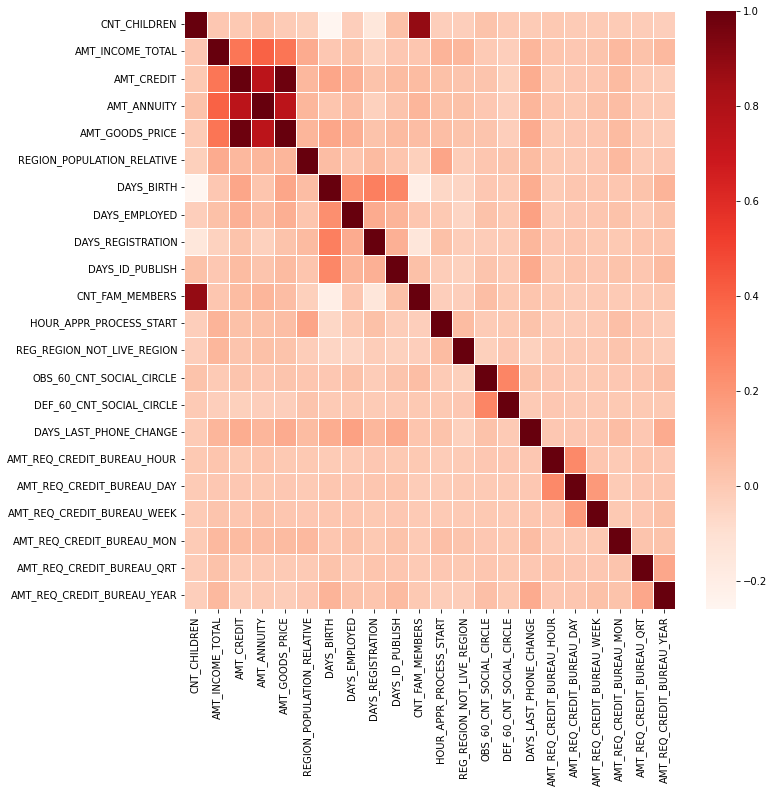

In [571]:
non_def=defaulters[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
plt.figure(figsize=(11,11))
sns.heatmap(non_def.corr(), cmap="Reds",annot=False,linewidth =1)
plt.show()

**top 10 correlations for non_defaulters**

In [572]:
non_default=non_def.corr()
non_default_new=non_default.unstack().reset_index()
non_default_new.columns =['VAR1','VAR2','Correlation']
non_default_new.sort_values(by='Correlation', ascending=False, inplace=True)
non_default_new.iloc[22:32,:]

,VAR1,VAR2,Correlation
90,AMT_GOODS_PRICE,AMT_CREDIT,0.982778
48,AMT_CREDIT,AMT_GOODS_PRICE,0.982778
220,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885533
10,CNT_CHILDREN,CNT_FAM_MEMBERS,0.885533
70,AMT_ANNUITY,AMT_GOODS_PRICE,0.752038
91,AMT_GOODS_PRICE,AMT_ANNUITY,0.752038
47,AMT_CREDIT,AMT_ANNUITY,0.751858
68,AMT_ANNUITY,AMT_CREDIT,0.751858
25,AMT_INCOME_TOTAL,AMT_ANNUITY,0.398230
67,AMT_ANNUITY,AMT_INCOME_TOTAL,0.398230


In [573]:
new=pd.pivot_table(data=app_df,index='NAME_EDUCATION_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')

**Education vs marital staus**

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='NAME_EDUCATION_TYPE'>

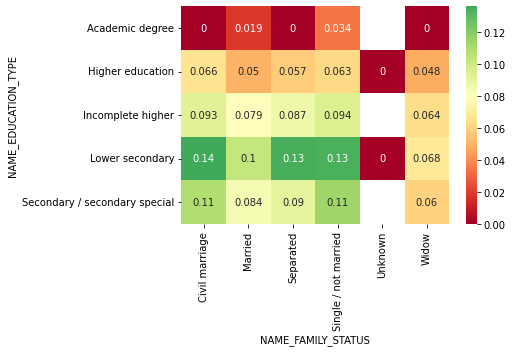

In [574]:
sns.heatmap(new,annot=True, cmap='RdYlGn',center=0.08)

**People with civil marriage and lower Sc eductaion likely to default more followed by lower Sc seperated and single people**

**Marital status vs Accompany**

In [575]:
new1=pd.pivot_table(data=app_df,index='NAME_TYPE_SUITE',columns='NAME_FAMILY_STATUS',values='TARGET')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='NAME_TYPE_SUITE'>

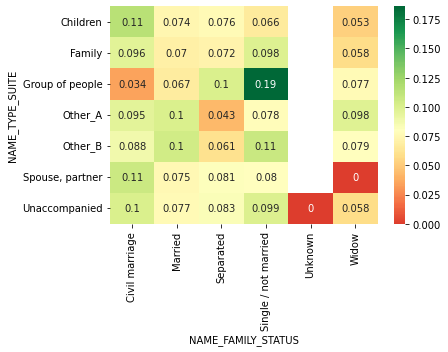

In [576]:
sns.heatmap(new1,annot=True, cmap='RdYlGn',center=0.08)

**Single people who are accompanied by the group of people in loan application are likely to default more**

**Occupation vs Marital status**

In [577]:
new3=pd.pivot_table(data=app_df,index='OCCUPATION_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='OCCUPATION_TYPE'>

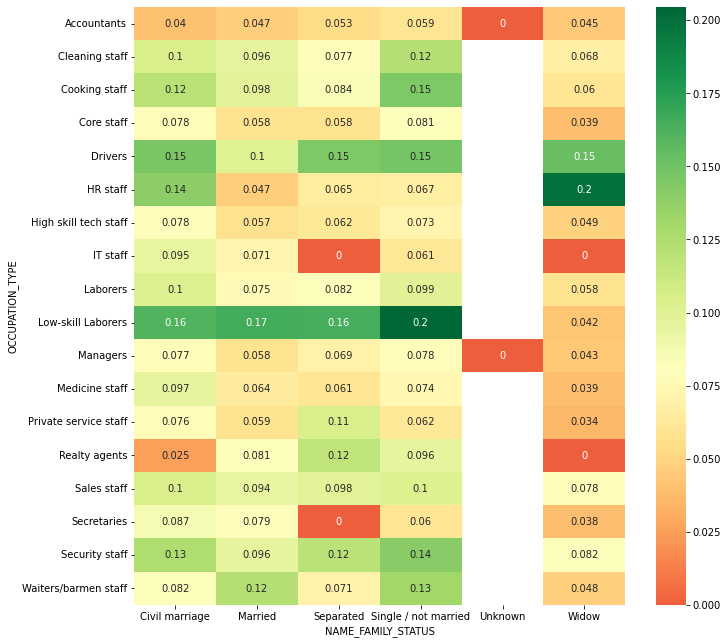

In [578]:
plt.figure(figsize=(11,11))
sns.heatmap(new3,annot=True, cmap='RdYlGn',center=0.08)

**Single,low skilled labours and widowed HR staff are likely to default More**

**Income type vs Marital status**

In [579]:
new4=pd.pivot_table(data=app_df,index='NAME_INCOME_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='NAME_INCOME_TYPE'>

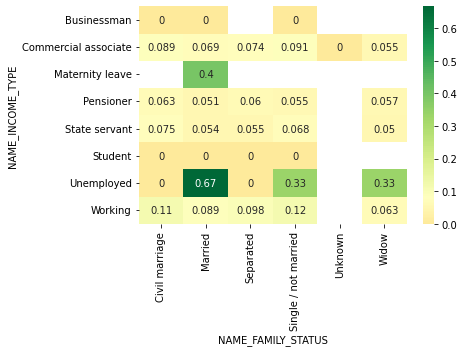

In [580]:

sns.heatmap(new4,annot=True, cmap='RdYlGn',center=0.08)


**Married unemployed are likely to default most**

**Property vs Marital Status**

In [581]:
new5=pd.pivot_table(data=app_df,index='NAME_HOUSING_TYPE',columns='NAME_FAMILY_STATUS',values='TARGET')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='NAME_HOUSING_TYPE'>

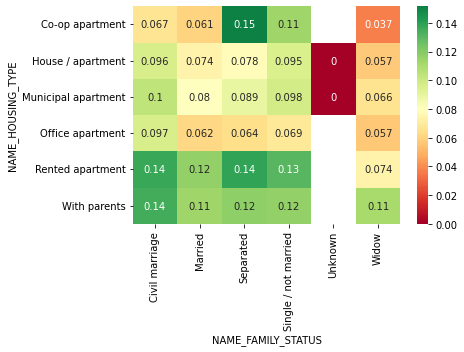

In [582]:
sns.heatmap(new5,annot=True, cmap='RdYlGn',center=0.08)

**People living in co-op appartements and are seperated are likely to default the loan followed by seperated and civil marriage living in rented appartements**

**Region VS Marital Status**

In [583]:
new6=pd.pivot_table(data=app_df,index='REGION_RATING_CLIENT',columns='NAME_FAMILY_STATUS',values='TARGET')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='REGION_RATING_CLIENT'>

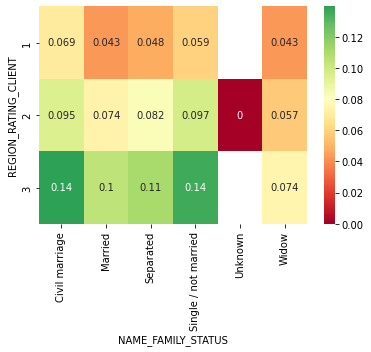

In [584]:
sns.heatmap(new6,annot=True, cmap='RdYlGn',center=0.08)

**People living in region 3 and are single or having civil marriage are likely to default**

**Region vs Education**

In [585]:
new7=pd.pivot_table(data=app_df,index='REGION_RATING_CLIENT',columns='NAME_EDUCATION_TYPE',values='TARGET')

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='REGION_RATING_CLIENT'>

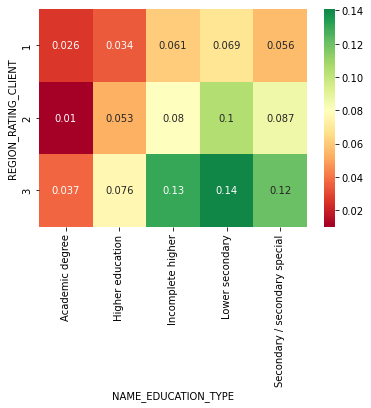

In [586]:
sns.heatmap(new7,annot=True, cmap='RdYlGn',center=0.08)

**People living in region 3 and having lower Sc education are  are likely to default follwed by people in the same region who havn't completed their higer education**

**Property vs Education**

In [587]:
new8=pd.pivot_table(data=app_df,index='NAME_HOUSING_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET')

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='NAME_HOUSING_TYPE'>

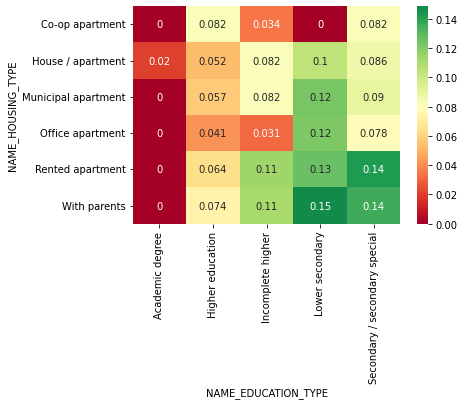

In [588]:
sns.heatmap(new8,annot=True, cmap='RdYlGn',center=0.08)

**People living with their parents and having lower Sc education are  are likely to default follwed by people  havn't compled their higer education**

**Income Type vs Education**

In [589]:
new9=pd.pivot_table(data=app_df,index='NAME_INCOME_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET')

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='NAME_INCOME_TYPE'>

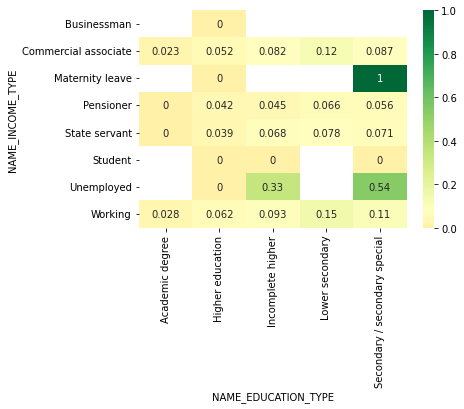

In [590]:
sns.heatmap(new9,annot=True, cmap='RdYlGn',center=0.08)

**Occupation vs Education**

In [591]:
new10=pd.pivot_table(data=app_df,index='OCCUPATION_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET')

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='OCCUPATION_TYPE'>

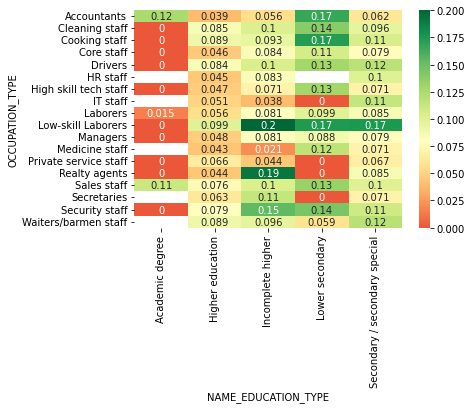

In [592]:
sns.heatmap(new10,annot=True, cmap='RdYlGn',center=0.08)

**Lets analyise the Previous application dataframe**

In [593]:
pre_df.isnull().sum()/len(pre_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [594]:
pre_df=pre_df.drop(pre_df[pre_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
pre_df=pre_df.drop(pre_df[pre_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

**Lets merge the datframe**

In [595]:
final =pd.merge(left=app_df,right=pre_df,how='inner',on='SK_ID_CURR')

In [596]:
final.shape

(59306, 78)

In [597]:
final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,0.900,1.800000,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010.0,4799.0,3015,1,1,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,599.0,0.0,0.0,0.0,0.0,0.0,1.0,0-100K,100K-200K,28,20-30,2.0,0-5,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,2.925,6.658920,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668.0,5266.0,3787,1,1,Laborers,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,1634.0,0.0,0.0,0.0,1.0,0.0,5.0,200k-300k,600k-700k,41,40-50,7.0,5-10,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,3.600,7.333155,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060.0,3557.0,3557,1,1,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,2.0,0.0,2.0,0.0,697.0,0.0,0.0,0.0,0.0,1.0,1.0,300k-400k,700k-800k,32,30-40,5.0,0-5,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,1.800,5.400000,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761.0,8236.0,4292,1,1,Managers,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,540.0,0.0,0.0,0.0,1.0,0.0,1.0,100K-200K,500k-600k,44,40-50,4.0,0-5,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,1.800,5.400000,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761.0,8236.0,4292,1,1,Managers,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,540.0,0.0,0.0,0.0,1.0,0.0,1.0,100K-200K,500k-600k,44,40-50,4.0,0-5,1529558,Cash loans,29053.215,450000.

<AxesSubplot:>

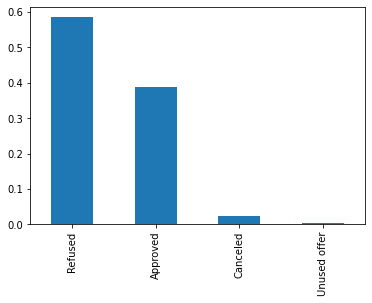

In [598]:
final.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()

**Education vs Offers**

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

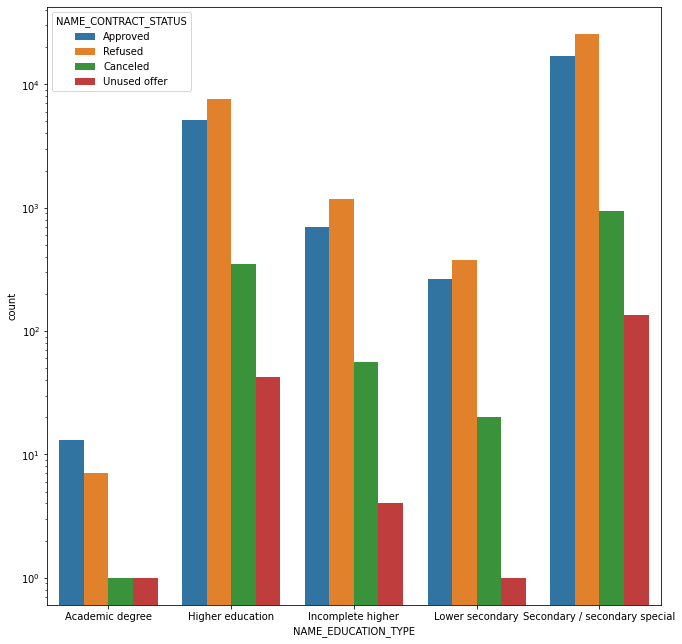

In [599]:
plt.figure(figsize=(11,11))
plt.yscale('log')
sns.countplot(data=final,x='NAME_EDUCATION_TYPE',hue='NAME_CONTRACT_STATUS')

**Most of the offer which are rejected or acceped are by people with secondary school education**

**Purpose vs offer**

<AxesSubplot:xlabel='NAME_CASH_LOAN_PURPOSE', ylabel='count'>

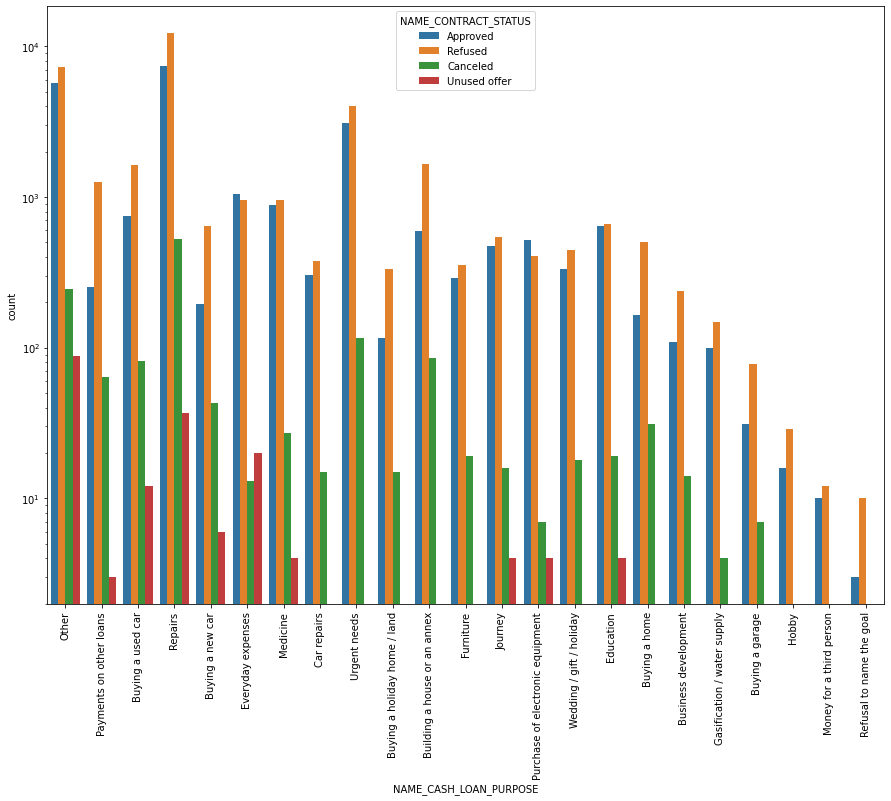

In [600]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=final,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')

**For repair most of the loans are given and most of the offers are reject**

**Property vs offer**

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='count'>

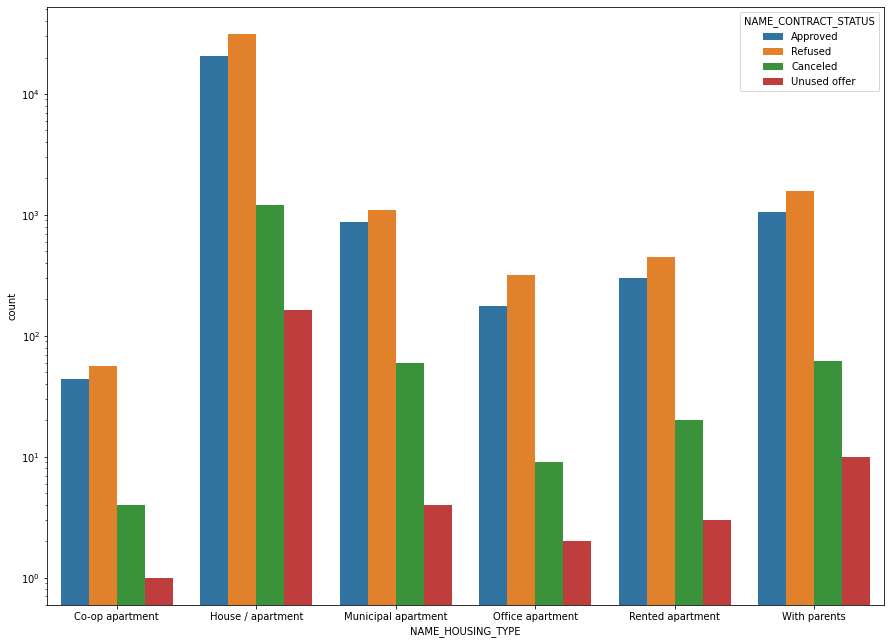

In [601]:
plt.figure(figsize=(15,11))
plt.yscale('log')
sns.countplot(data=final,x='NAME_HOUSING_TYPE',hue='NAME_CONTRACT_STATUS')

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

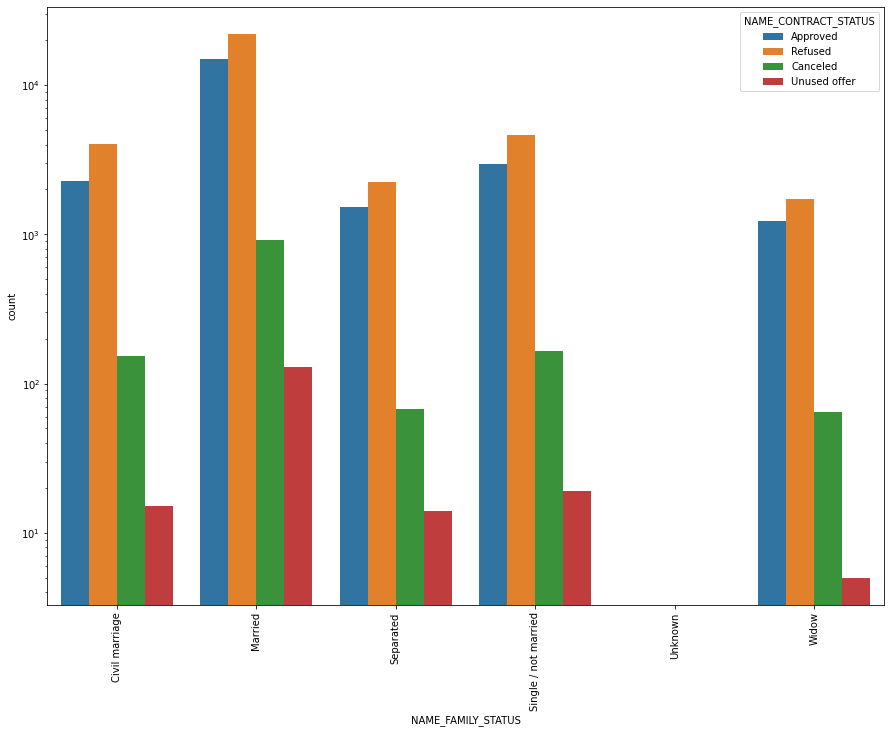

In [602]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=final,x='NAME_FAMILY_STATUS',hue='NAME_CONTRACT_STATUS')

<AxesSubplot:xlabel='ORGANIZATION_TYPE', ylabel='count'>

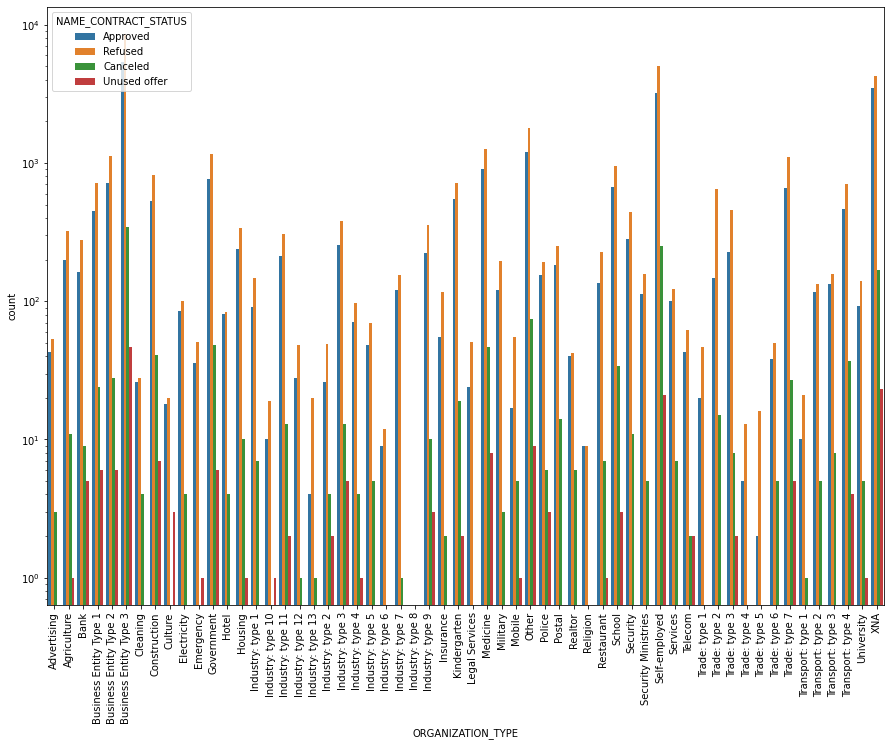

In [603]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=final,x='ORGANIZATION_TYPE',hue='NAME_CONTRACT_STATUS')

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

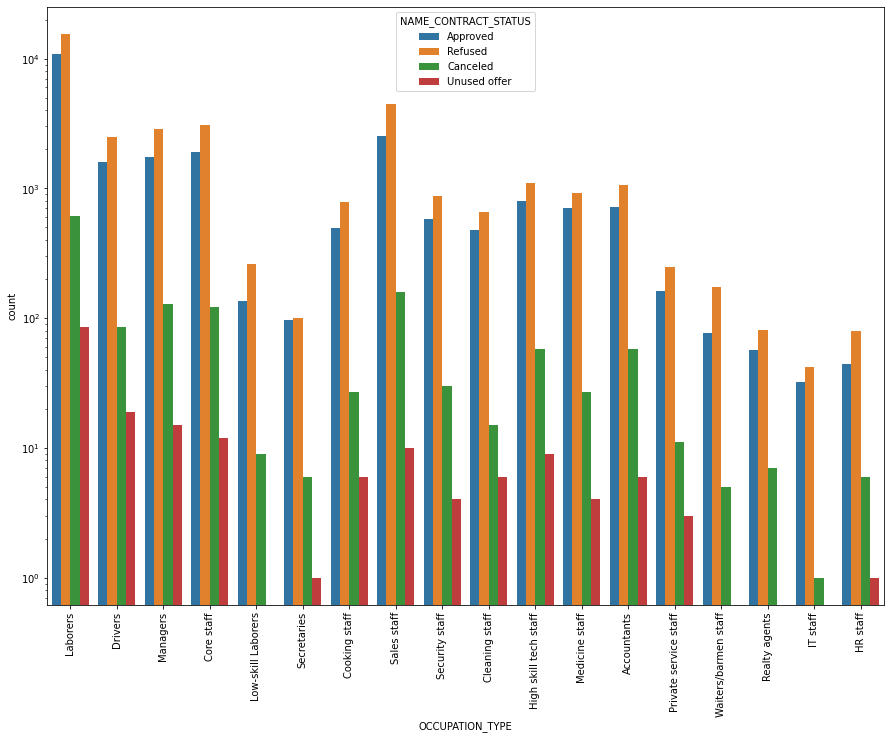

In [604]:
plt.figure(figsize=(15,11))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=final,x='OCCUPATION_TYPE',hue='NAME_CONTRACT_STATUS')

# Defaulters Conditions

* Cash loan takers are more likely to default a payment.
* Men are more defaulters tham women.
* Parents with 6 kids and more are more phrone to become a defaulter.
* People who live in rented appartments or are living with their parents likely to   default a payment.
* People in the age group range 20-40 have higher probability of defaulting.
* A great number of people from region 3 are defaulting despite of their smaller     number.
* If the salary is less than 500k more chances of defaulting chances for default.
* People given loan between 300k and 700k have high possibilty to default.
* People who are unemployed or are on maternity leave have high chances to default   the payments.
* People with Lower secondary education have more chances to be a defaulter.
* People with civil marriage or single or seperated are more likely  to default.
* Low-skill Laborers ,drivers Waiters/barmen staff, Security staff, Laborers and     Cooking staff,sales staff are the highest categories to default.
* More the number of family members more one likely to default.
* Organizations with highest percent of loans not repaid are Transport: type 3 ,     Industry: type 13 , Industry: type 8 and Restaurant.
* People with civil marriage and lower Sc eductaion likely to default more           followed by lower Sc seperated and single people .  
* Single people who are accompanied by the group of people in loan application are   likely to default more.
* Single low skilled labours and widowed HR staff are likely to default More 
* Married unemployed are likely to default most.  
* People living in co-op appartements and are seperated are likely to default the   loan followed by seperated and civil marriage living in rented appartements 
* People living in region 3 and are single or having civil marriage are likely to   default .
* People living in region 3 and having lower Sc education are  are likely to         default follwed by people in the same region who havn't completed their higer     education.
* People living with their parents and having lower Sc education are are likely to default follwed by people havn't compled their higer education.

